Based on aspects of building location and construction, your goal is to predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal.

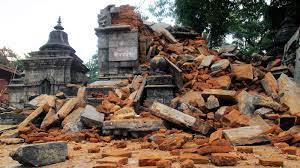


The data was collected through surveys by Kathmandu Living Labs and the Central Bureau of Statistics, which works under the National Planning Commission Secretariat of Nepal. This survey is one of the largest post-disaster datasets ever collected, containing valuable information on earthquake impacts, household conditions, and socio-economic-demographic statistics.




Problem description
We're trying to predict the ordinal variable damage_grade, which represents a level of damage to the building that was hit by the earthquake. There are 3 grades of the damage:

1 represents low damage

2 represents a medium amount of damage

3 represents almost complete destruction



  Features


The dataset mainly consists of information on the buildings
' structure and their legal ownership. Each row in the dataset represents a specific building in the region that was hit by Gorkha earthquake.

There are 39 columns in this dataset, where the building_id column is a unique and random identifier. 
The remaining 38 features are described in the section below. 
Categorical variables have been obfuscated random lowercase ascii characters. 
The appearance of the same character in distinct columns does not imply the same original value.


   Description

geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int): geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). 
    
Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.
                
count_floors_pre_eq (type: int): number of floors in the building before the earthquake.
    
age (type: int): age of the building in years.
    
area_percentage (type: int): normalized area of the building footprint.
    
height_percentage (type: int): normalized height of the building footprint.
    
land_surface_condition (type: categorical): surface condition of the land where the building was built. Possible values: n, o, t.
        
foundation_type (type: categorical): type of foundation used while building. Possible values: h, i, r, u, w.
        
roof_type (type: categorical): type of roof used while building. Possible values: n, q, x.
        
ground_floor_type (type: categorical): type of the ground floor. Possible values: f, m, v, x, z.
        
other_floor_type (type: categorical): type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.
        
position (type: categorical): position of the building. Possible values: j, o, s, t.
        
plan_configuration (type: categorical): building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.
        
has_superstructure_adobe_mud (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud.
    
has_superstructure_mud_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Stone.
    
has_superstructure_stone_flag (type: binary): flag variable that indicates if the superstructure was made of Stone.
    
has_superstructure_cement_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.
    
has_superstructure_mud_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
    
has_superstructure_cement_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.
    
has_superstructure_timber (type: binary): flag variable that indicates if the superstructure was made of Timber.
    
has_superstructure_bamboo (type: binary): flag variable that indicates if the superstructure was made of Bamboo.
    
has_superstructure_rc_non_engineered (type: binary): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.
    
has_superstructure_rc_engineered (type: binary): flag variable that indicates if the superstructure was made of engineered reinforced concrete.
    
has_superstructure_other (type: binary): flag variable that indicates if the superstructure was made of any other material.
    
legal_ownership_status (type: categorical): legal ownership status of the land where building was built. Possible values: a, r, v, w.
        
count_families (type: int): number of families that live in the building.
    
has_secondary_use (type: binary): flag variable that indicates if the building was used for any secondary purpose.
    
has_secondary_use_agriculture (type: binary): flag variable that indicates if the building was used for agricultural purposes.
    
has_secondary_use_hotel (type: binary): flag variable that indicates if the building was used as a hotel.
    
has_secondary_use_rental (type: binary): flag variable that indicates if the building was used for rental purposes.
    
has_secondary_use_institution (type: binary): flag variable that indicates if the building was used as a location of any institution.
    
has_secondary_use_school (type: binary): flag variable that indicates if the building was used as a school.
    
has_secondary_use_industry (type: binary): flag variable that indicates if the building was used for industrial purposes.
    
has_secondary_use_health_post (type: binary): flag variable that indicates if the building was used as a health post.
    
has_secondary_use_gov_office (type: binary): flag variable that indicates if the building was used fas a government office.
    
has_secondary_use_use_police (type: binary): flag variable that indicates if the building was used as a police station.
    
has_secondary_use_other (type: binary): flag variable that indicates if the building was secondarily used for other purposes.

# The analysis for this project will follow the  Process which are ;

Business Understanding

Data Understanding

Data Preparation

Modelling

Evaluation


In [1]:
# Importing Necessary Libraries :

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [3]:
import io
%cd "C:\Users\91866\Desktop\github_dataset\Capston_4-Richter's Predictor Modeling Earthquake Damage(Competation)"

C:\Users\91866\Desktop\github_dataset\Capston_4-Richter's Predictor Modeling Earthquake Damage(Competation)


In [4]:
train_X = pd.read_csv("train_values.csv")
train_Y = pd.read_csv("train_labels.csv")
test_X =  pd.read_csv("test_values.csv")

In [5]:
# Display Training Dataset
train_X.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_Y.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [7]:
test_X.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Merge train_X and train_Y into train dataframe for Exploring the dataset :
train = pd.merge(train_X,train_Y)
train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [10]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   building_id                             86868 non-null  int64 
 1   geo_level_1_id                          86868 non-null  int64 
 2   geo_level_2_id                          86868 non-null  int64 
 3   geo_level_3_id                          86868 non-null  int64 
 4   count_floors_pre_eq                     86868 non-null  int64 
 5   age                                     86868 non-null  int64 
 6   area_percentage                         86868 non-null  int64 
 7   height_percentage                       86868 non-null  int64 
 8   land_surface_condition                  86868 non-null  object
 9   foundation_type                         86868 non-null  object
 10  roof_type                               86868 non-null  object
 11  gr

In [11]:
train.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [12]:
# knowing the statistical measures
train.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [13]:
# Checking the number missing value of each columns 
train.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [14]:
train.nunique()

building_id                               260601
geo_level_1_id                                31
geo_level_2_id                              1414
geo_level_3_id                             11595
count_floors_pre_eq                            9
age                                           42
area_percentage                               84
height_percentage                             27
land_surface_condition                         3
foundation_type                                5
roof_type                                      3
ground_floor_type                              5
other_floor_type                               4
position                                       4
plan_configuration                            10
has_superstructure_adobe_mud                   2
has_superstructure_mud_mortar_stone            2
has_superstructure_stone_flag                  2
has_superstructure_cement_mortar_stone         2
has_superstructure_mud_mortar_brick            2
has_superstructure_c

In [15]:
train_new=train[['roof_type', 'foundation_type', 'land_surface_condition', 'ground_floor_type', 'other_floor_type','position','plan_configuration','legal_ownership_status','damage_grade']]

In [16]:
train_new.columns

Index(['roof_type', 'foundation_type', 'land_surface_condition',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status', 'damage_grade'],
      dtype='object')

In [17]:
for i in train_new.columns:
    print(train_new[i].unique())

['n' 'q' 'x']
['r' 'w' 'i' 'u' 'h']
['t' 'o' 'n']
['f' 'x' 'v' 'z' 'm']
['q' 'x' 'j' 's']
['t' 's' 'j' 'o']
['d' 'u' 's' 'q' 'm' 'c' 'a' 'n' 'f' 'o']
['v' 'a' 'r' 'w']
[3 2 1]


In [18]:
for i in train_new.columns:
    print(train_new[i].value_counts())

n    182842
q     61576
x     16183
Name: roof_type, dtype: int64
r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64
t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64
f    209619
x     24877
v     24593
z      1004
m       508
Name: ground_floor_type, dtype: int64
q    165282
x     43448
j     39843
s     12028
Name: other_floor_type, dtype: int64
s    202090
t     42896
j     13282
o      2333
Name: position, dtype: int64
d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: plan_configuration, dtype: int64
v    250939
a      5512
w      2677
r      1473
Name: legal_ownership_status, dtype: int64
2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64


In [19]:
selected_features = ['foundation_type', 
                     'area_percentage', 
                     'height_percentage',
                     'count_floors_pre_eq',
                     'land_surface_condition',
                     'has_superstructure_cement_mortar_stone']

train_values= train[selected_features]

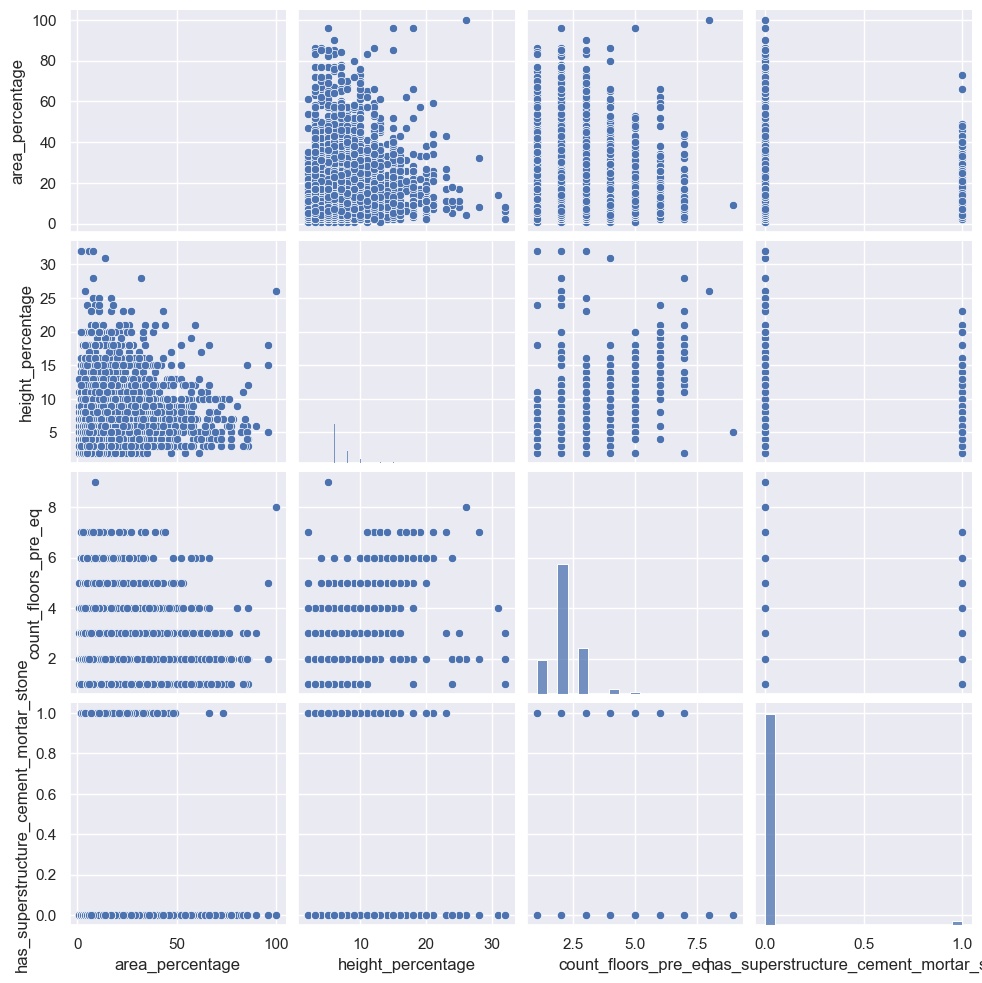

In [20]:
sns.pairplot(train_values)

<AxesSubplot: xlabel='damage_grade', ylabel='count'>

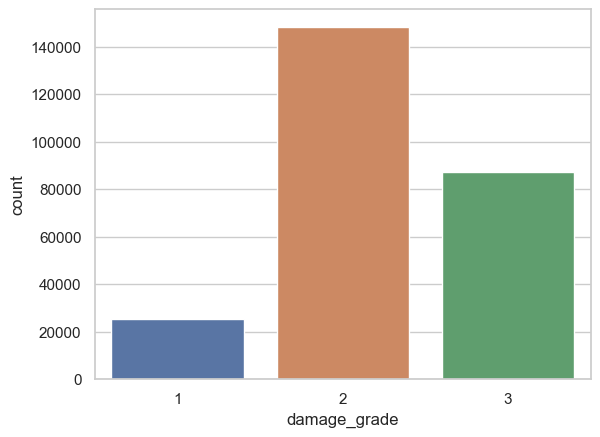

In [21]:
# Making Count plot survived column
sns.set_style('whitegrid')
sns.countplot(x='damage_grade',data=train)

insights:
    
There are 3 grades of the damage:
1- represents low damage
2- represents a medium amount of damage
3- represents almost complete destruction

 As we can see that the medium amount of damage is done on higher level followed by 
 almost complete destruction and then low damage
    


<AxesSubplot: xlabel='damage_grade', ylabel='count'>

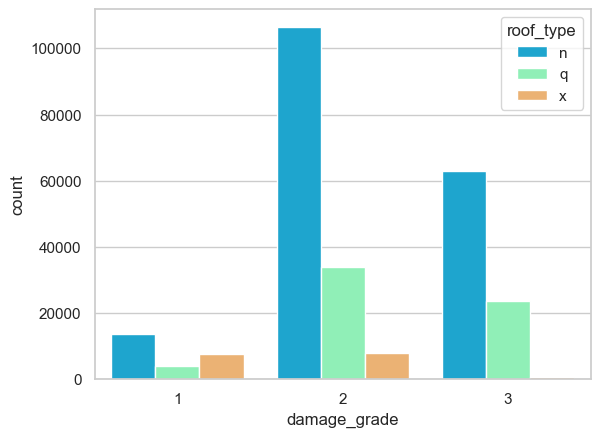

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='damage_grade',hue='roof_type',data=train,palette='rainbow')

Insights:

1. As we can see that the damage grade with respect to roof type values: n, q, x.

2.'n' type of roof found in most of the damaged buildings.

<AxesSubplot: xlabel='damage_grade', ylabel='count'>

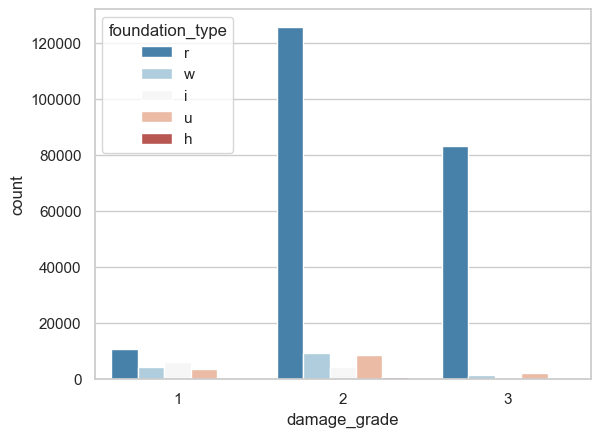

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='damage_grade',hue='foundation_type',data=train,palette='RdBu_r')

Check no. of floors in building with 'r' foundation type

In [24]:
found_type=train['foundation_type']=='r'
train[found_type].count_floors_pre_eq.value_counts(normalize=True)*100

2    61.635705
3    23.336192
1    12.376594
4     1.832150
5     0.770543
6     0.043340
7     0.005018
9     0.000456
Name: count_floors_pre_eq, dtype: float64

62% of the buildings with 'r' type foundation had 2 floors before earthquake.

Insights:

1.As we can see that the damage grade with respect to foundation used while building. Possible values: h, i, r, u, w.

2.'r' type of foundation is the leading type of foundation found in most of the damaged buildings.

<AxesSubplot: xlabel='damage_grade', ylabel='count'>

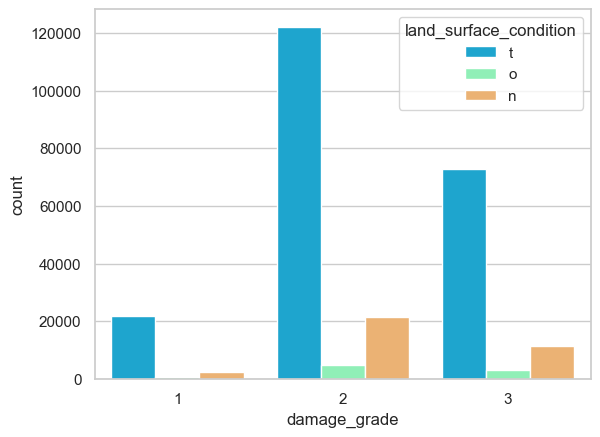

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='damage_grade',hue='land_surface_condition',data=train,palette='rainbow')

Insights:

1.As we can see that the damage grade with respect to surface condition of the land where the building was built. Possible values: n, o, t.

2.'t' type of land surface condition found in most of the damaged buildings.

<AxesSubplot: xlabel='damage_grade', ylabel='count'>

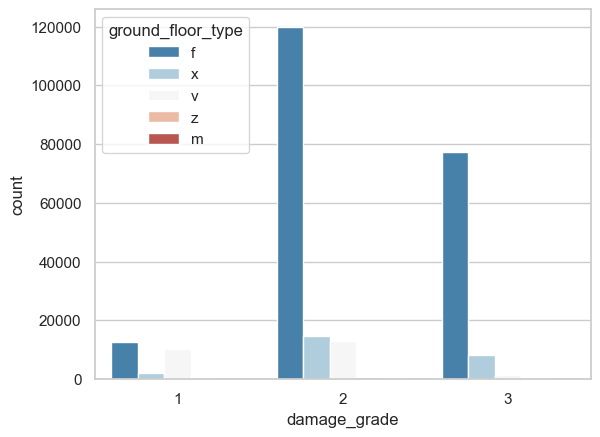

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='damage_grade',hue='ground_floor_type',data=train,palette='RdBu_r')

Insights:

1.As we can see that the damage grade with respect to ground floor type. Possible values: f, m, v, x, z.

2.'f' type of ground floor type found in most of the damaged buildings

<AxesSubplot: xlabel='damage_grade', ylabel='count'>

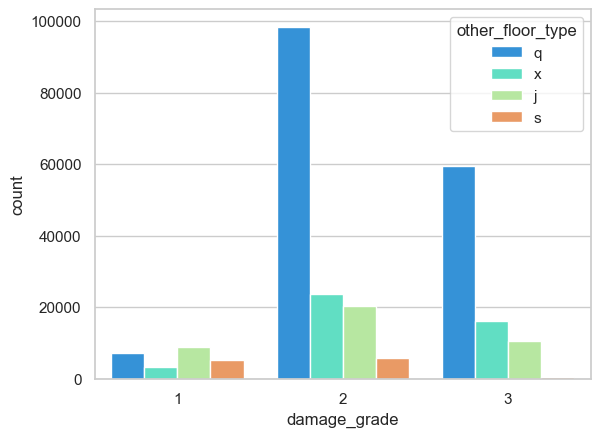

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='damage_grade',hue='other_floor_type',data=train,palette='rainbow')

Insights:

1.As we can see that the damage grade with respect to type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.

2.'q' type of other floor type found in most of the damaged buildings

<AxesSubplot: xlabel='damage_grade', ylabel='count'>

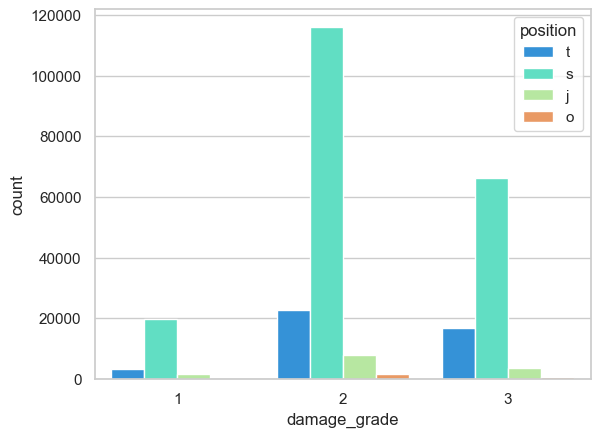

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='damage_grade',hue='position',data=train,palette='rainbow')

Insights:

1.As we can see that the damage grade with respect to position of the building. Possible values: j, o, s, t.

2.'s' type of positrion found in most of the damaged buildings

<AxesSubplot: xlabel='damage_grade', ylabel='count'>

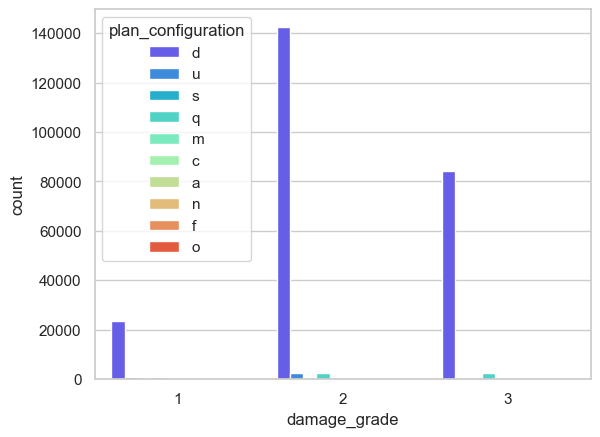

In [29]:
sns.set_style('whitegrid')
sns.countplot(x='damage_grade',hue='plan_configuration',data=train,palette='rainbow')

Insights:

1.As we can see that the damage grade with respect to building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.

2.'d' type of plan configuration found in most of the damaged buildings

<AxesSubplot: xlabel='damage_grade', ylabel='count'>

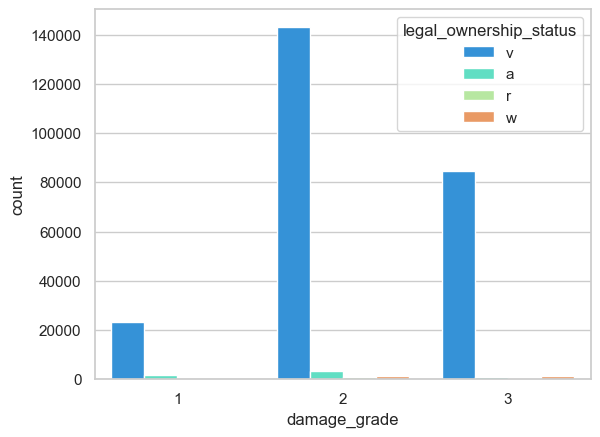

In [30]:
sns.set_style('whitegrid')
sns.countplot(x='damage_grade',hue='legal_ownership_status',data=train,palette='rainbow')

Insights:

1.As we can see that the damage grade with respect to legal ownership status of the land where building was built. Possible values: a, r, v, w.

2.'v' type of legal ownership status in most of the damaged buildings

Check distrinution of no. of families living in the buildings

Text(0.5, 1.0, 'Distribution of count_families variable')

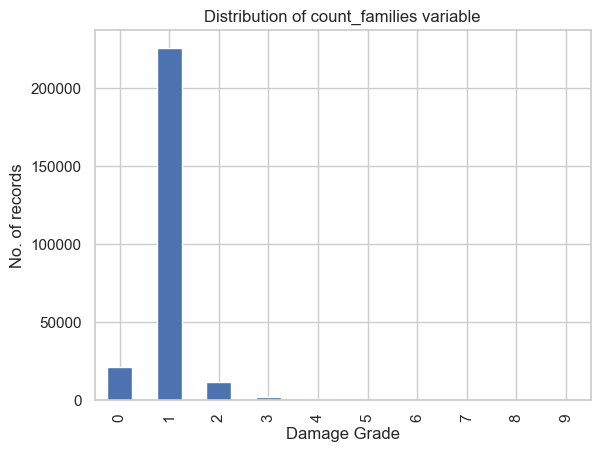

In [31]:
train['count_families'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Damage Grade')
plt.ylabel('No. of records')
plt.title('Distribution of count_families variable')

Maximum homes damaged were single faily homes

<AxesSubplot: xlabel='damage_grade', ylabel='count'>

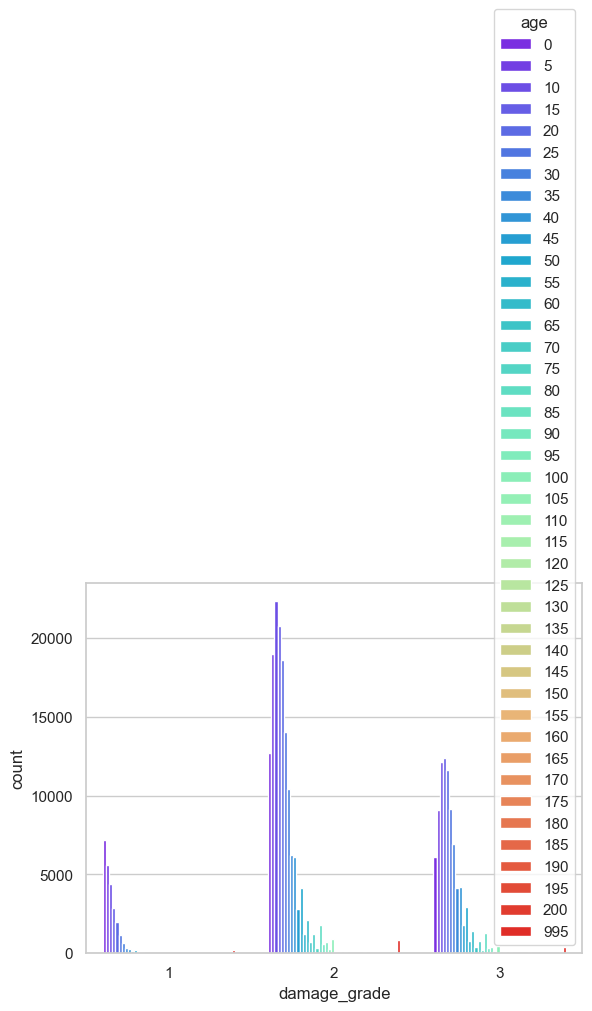

In [32]:
sns.set_style('whitegrid')
sns.countplot(x='damage_grade',hue='age'
              ,data=train,palette='rainbow')

Analyze effect of building's age on the damage caused for building of age 50-100 years

<AxesSubplot: xlabel='age', ylabel='height_percentage'>

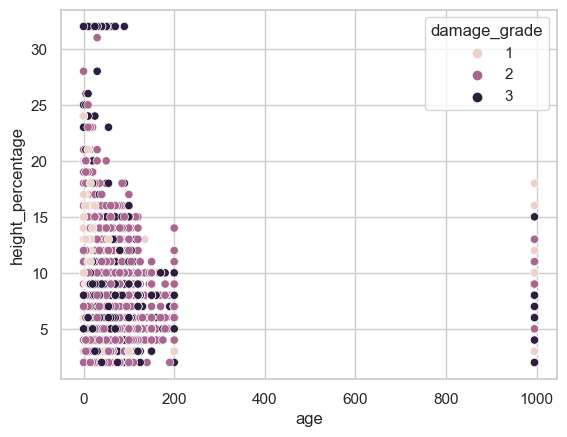

In [33]:
sns.scatterplot(y ='height_percentage', x = 'age', 
                    hue="damage_grade", data=train)

In [34]:
categorical = pd.DataFrame(train[['land_surface_condition', 
                                    'foundation_type', 
                                    'roof_type', 
                                    'ground_floor_type', 
                                    'other_floor_type', 
                                    'plan_configuration',
                                    'position', 
                                    'legal_ownership_status']])

binary1 = pd.DataFrame(train[['has_superstructure_adobe_mud',
                               'has_superstructure_mud_mortar_stone',
                               'has_superstructure_stone_flag', 
                               'has_superstructure_cement_mortar_stone',
                               'has_superstructure_mud_mortar_brick',
                               'has_superstructure_cement_mortar_brick',
                               'has_superstructure_timber',
                               'has_superstructure_bamboo',
                               'has_superstructure_rc_non_engineered', 
                               'has_superstructure_rc_engineered',
                               'has_superstructure_other']])

binary2 = pd.DataFrame(train[["has_secondary_use",
                               'has_secondary_use_agriculture',
                               'has_secondary_use_hotel',
                               'has_secondary_use_rental',
                               'has_secondary_use_institution',
                               'has_secondary_use_school',
                               'has_secondary_use_industry',
                               'has_secondary_use_health_post',
                               'has_secondary_use_gov_office',
                               'has_secondary_use_use_police',
                               'has_secondary_use_other']])

numeric = pd.DataFrame(train[["age",
                                "area_percentage",
                                "height_percentage",
                               "geo_level_1_id",
                               "geo_level_2_id",
                               "geo_level_3_id"]])


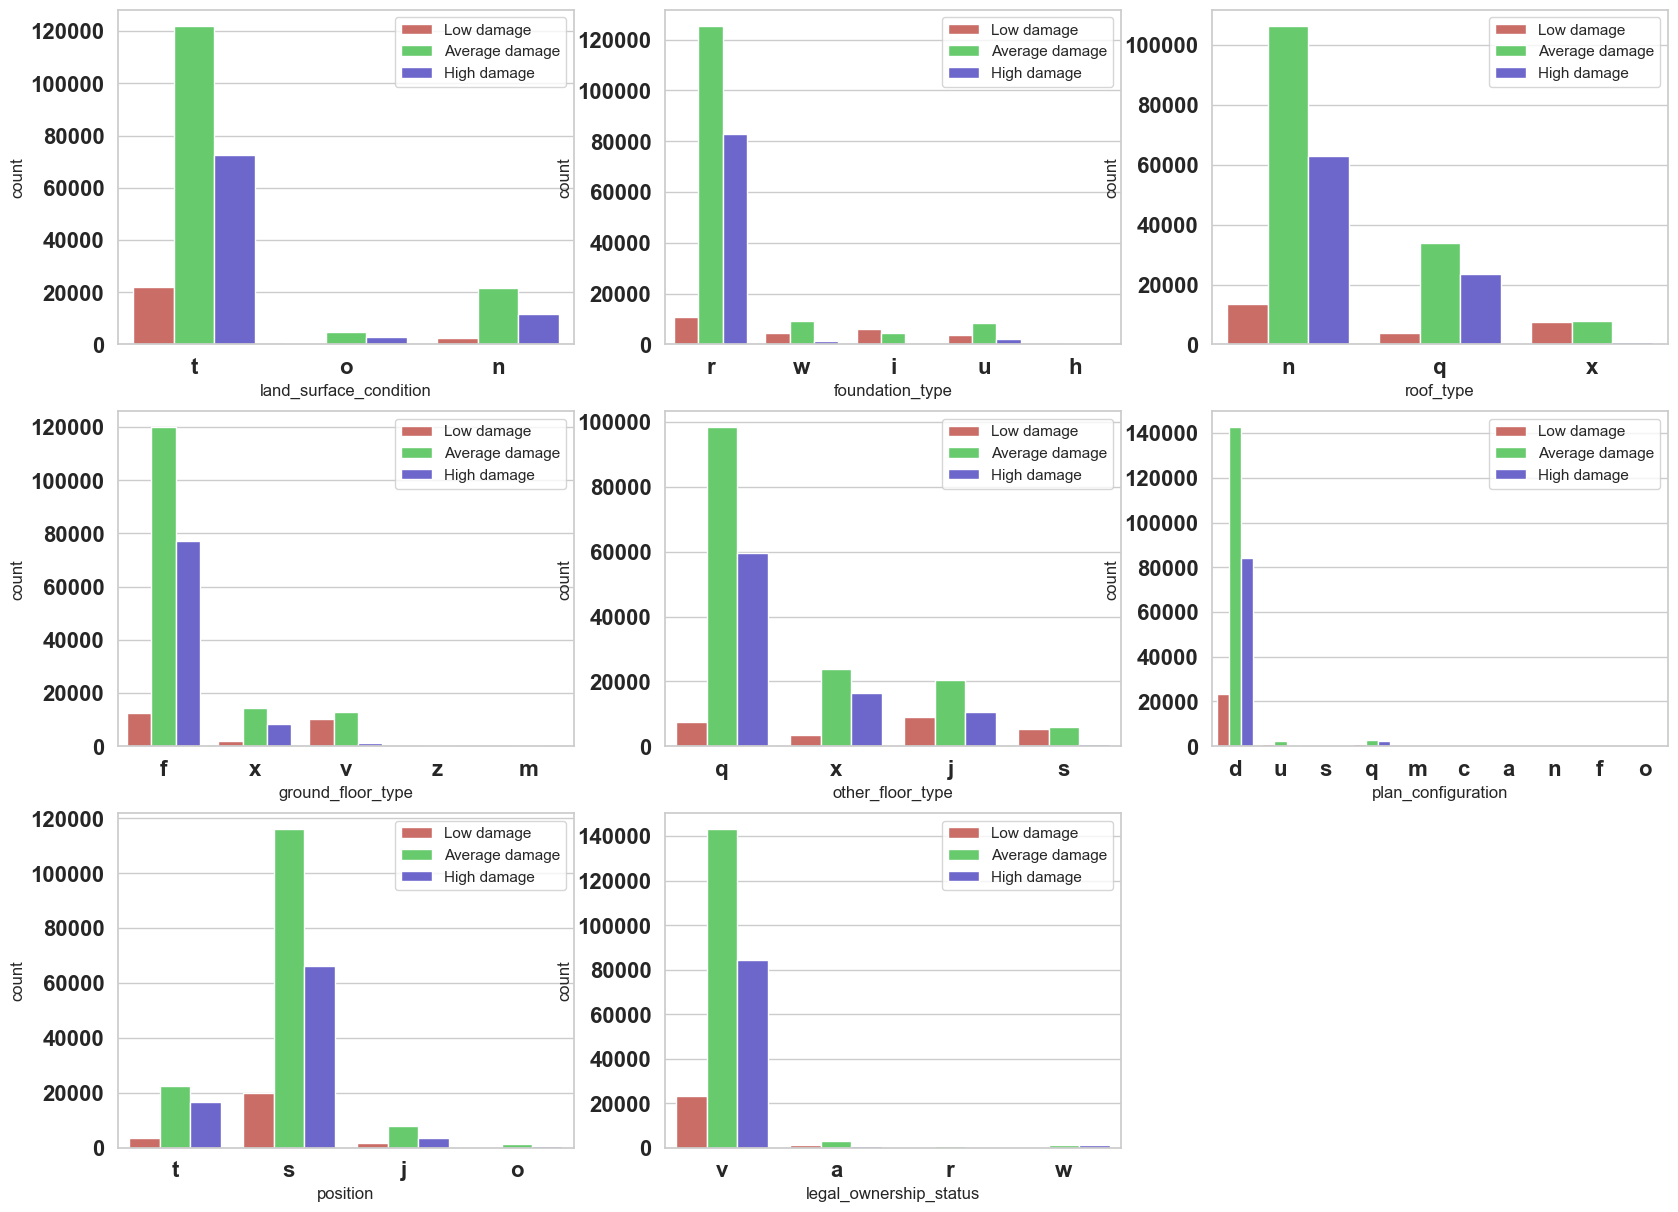

In [35]:
font={'weight' : 'bold', 'size': 16}       
q = 1
plt.figure(figsize=(20,20))
for j in categorical:
    plt.subplot(4,3,q)
    ax = sns.countplot(x=train[j].dropna(),palette="hls",hue=train["damage_grade"])
    plt.xticks(**font)
    plt.yticks(**font)
    plt.xlabel(j)
    plt.legend(["Low damage","Average damage","High damage"])
    q+=1
plt.show()

Notable Insights Looking at the land surface condition of the building, the type T has a significant impact on the severity of damage on the building Looking at the foundation type, we can observe that floor type of the value R has a significant impact on the severity of damage on the building  Also ground floor type of the type F has a significant impact on the level of damage on the building

Many of the of the findings here are observational as we can see, and it show they are going to have a significant impact when building our model

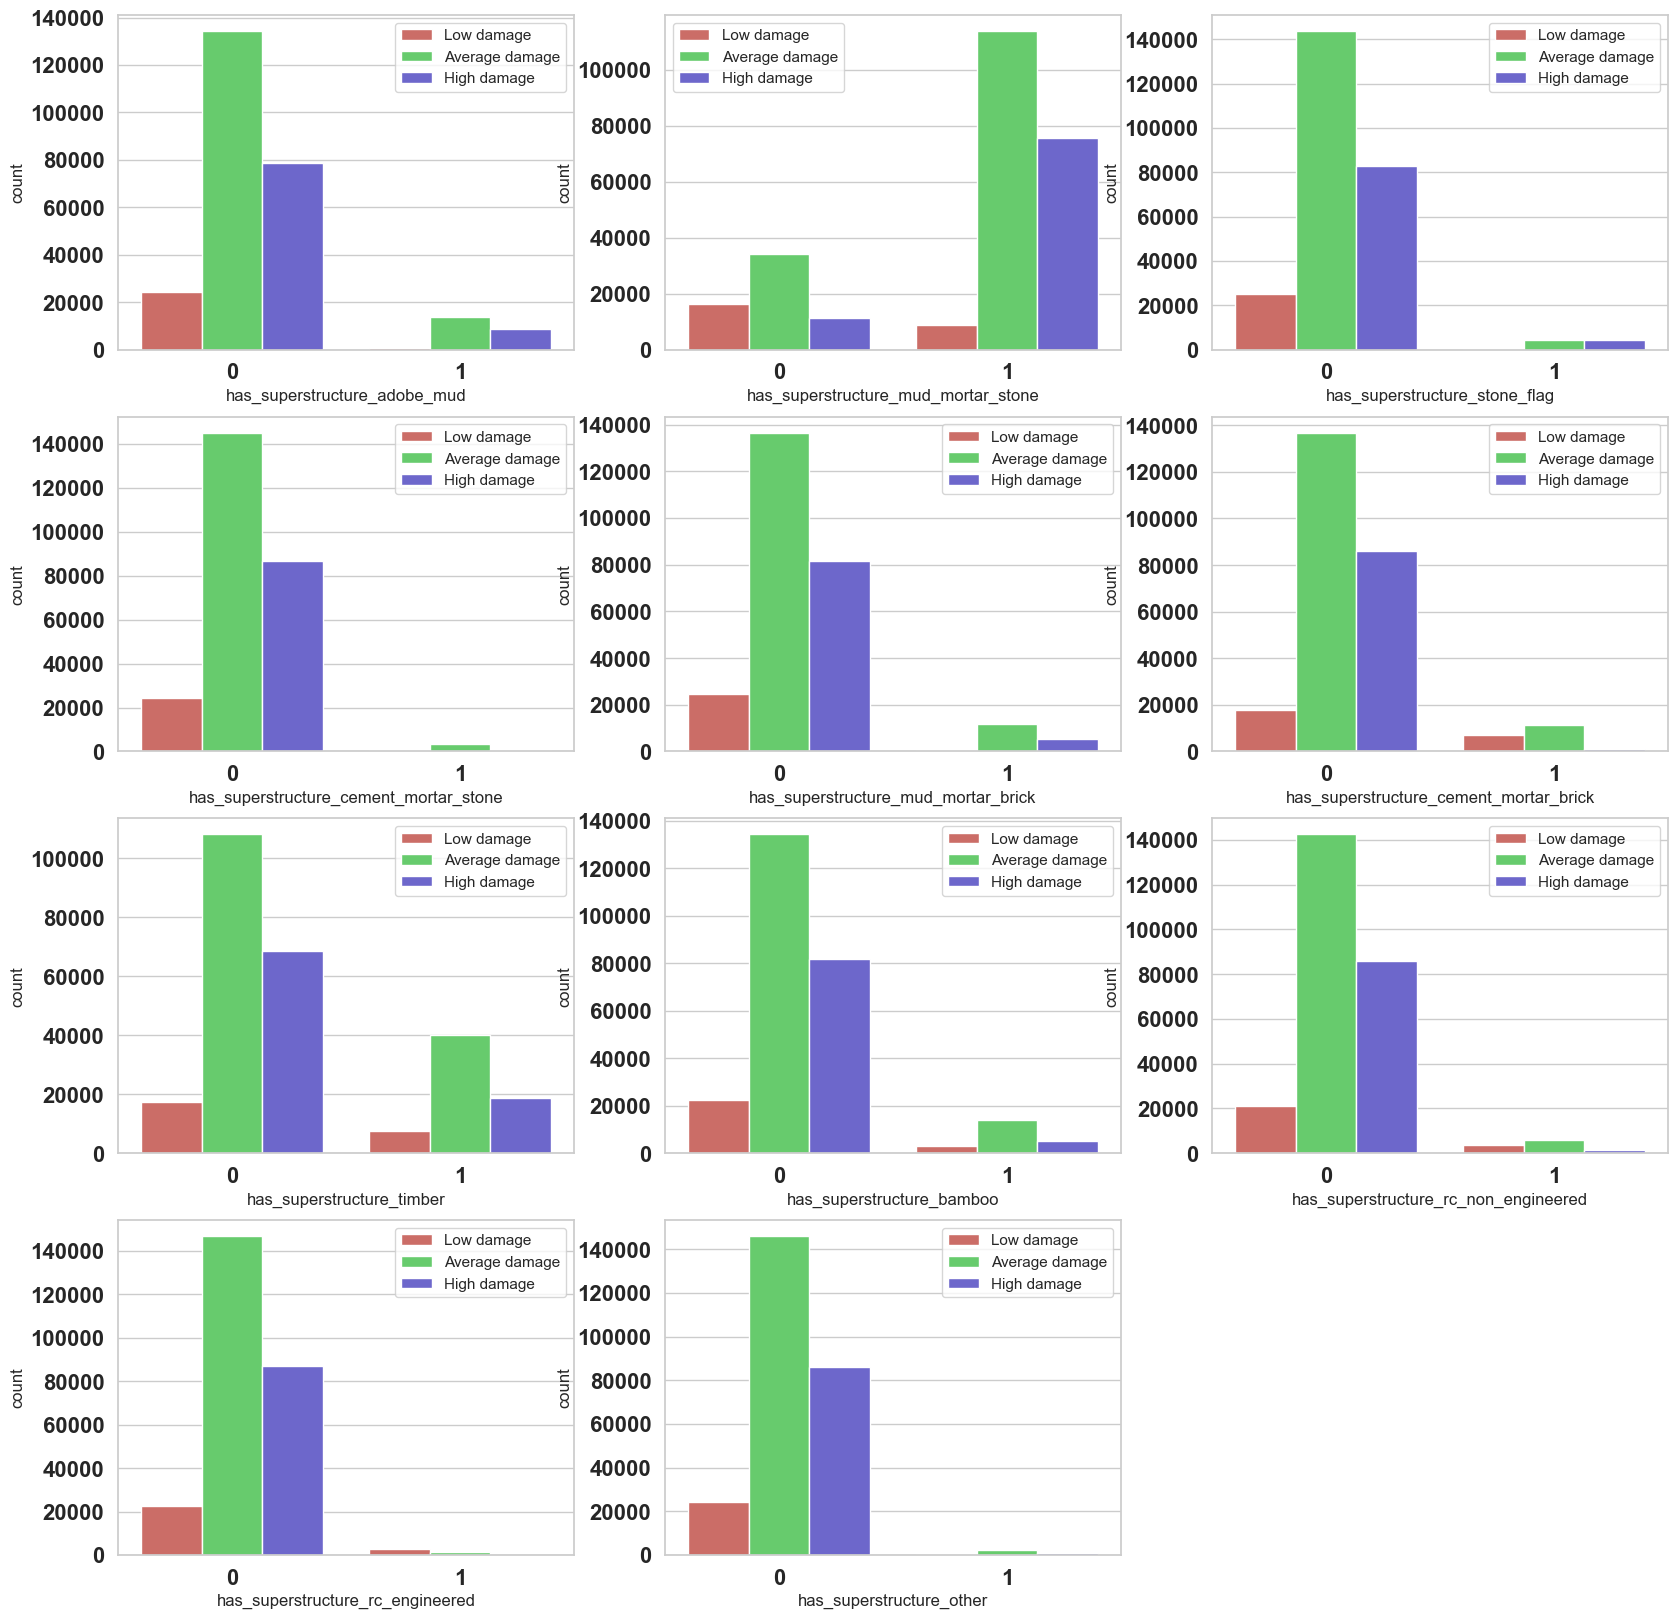

In [36]:
font={'weight' : 'bold', 'size': 16}       
q = 1
plt.figure(figsize=(20,20))
for j in binary1:
    plt.subplot(4,3,q)
    ax = sns.countplot(x=train[j].dropna(),palette="hls",hue=train["damage_grade"])
    plt.xticks(**font)
    plt.yticks(**font)
    plt.xlabel(j)
    plt.legend(["Low damage","Average damage","High damage"])
    q+=1
plt.show()

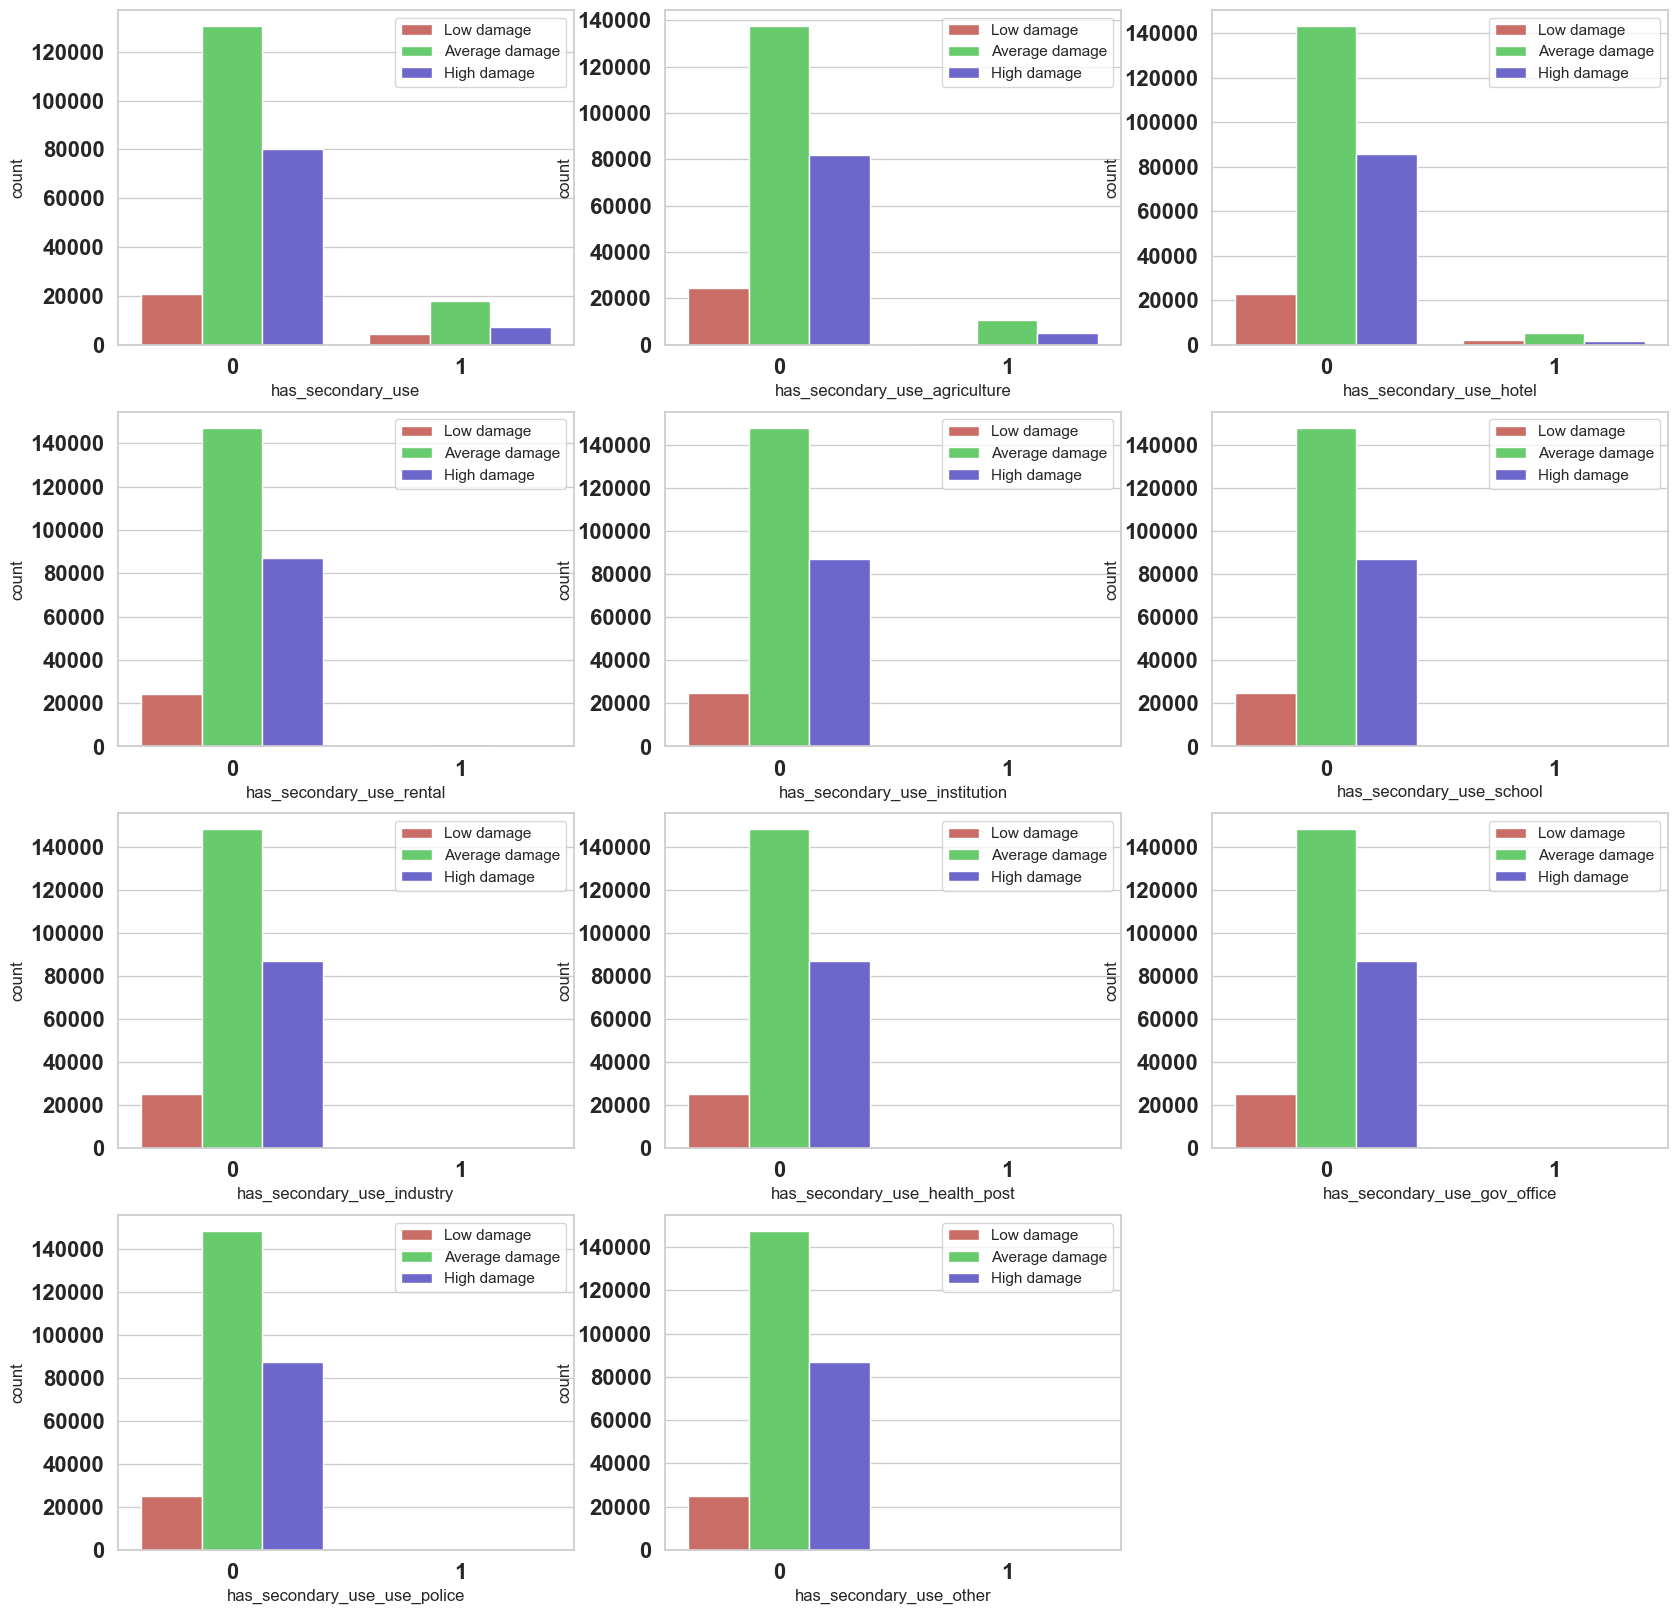

In [37]:
font={'weight' : 'bold', 'size': 16}       
q = 1
plt.figure(figsize=(20,20))
for j in binary2:
    plt.subplot(4,3,q)
    ax = sns.countplot(x=train[j].dropna(),palette="hls",hue=train["damage_grade"])
    plt.xticks(**font)
    plt.yticks(**font)
    plt.xlabel(j)
    plt.legend(["Low damage","Average damage","High damage"])
    q+=1
plt.show()

<AxesSubplot: xlabel='damage_grade', ylabel='ground_floor_type'>

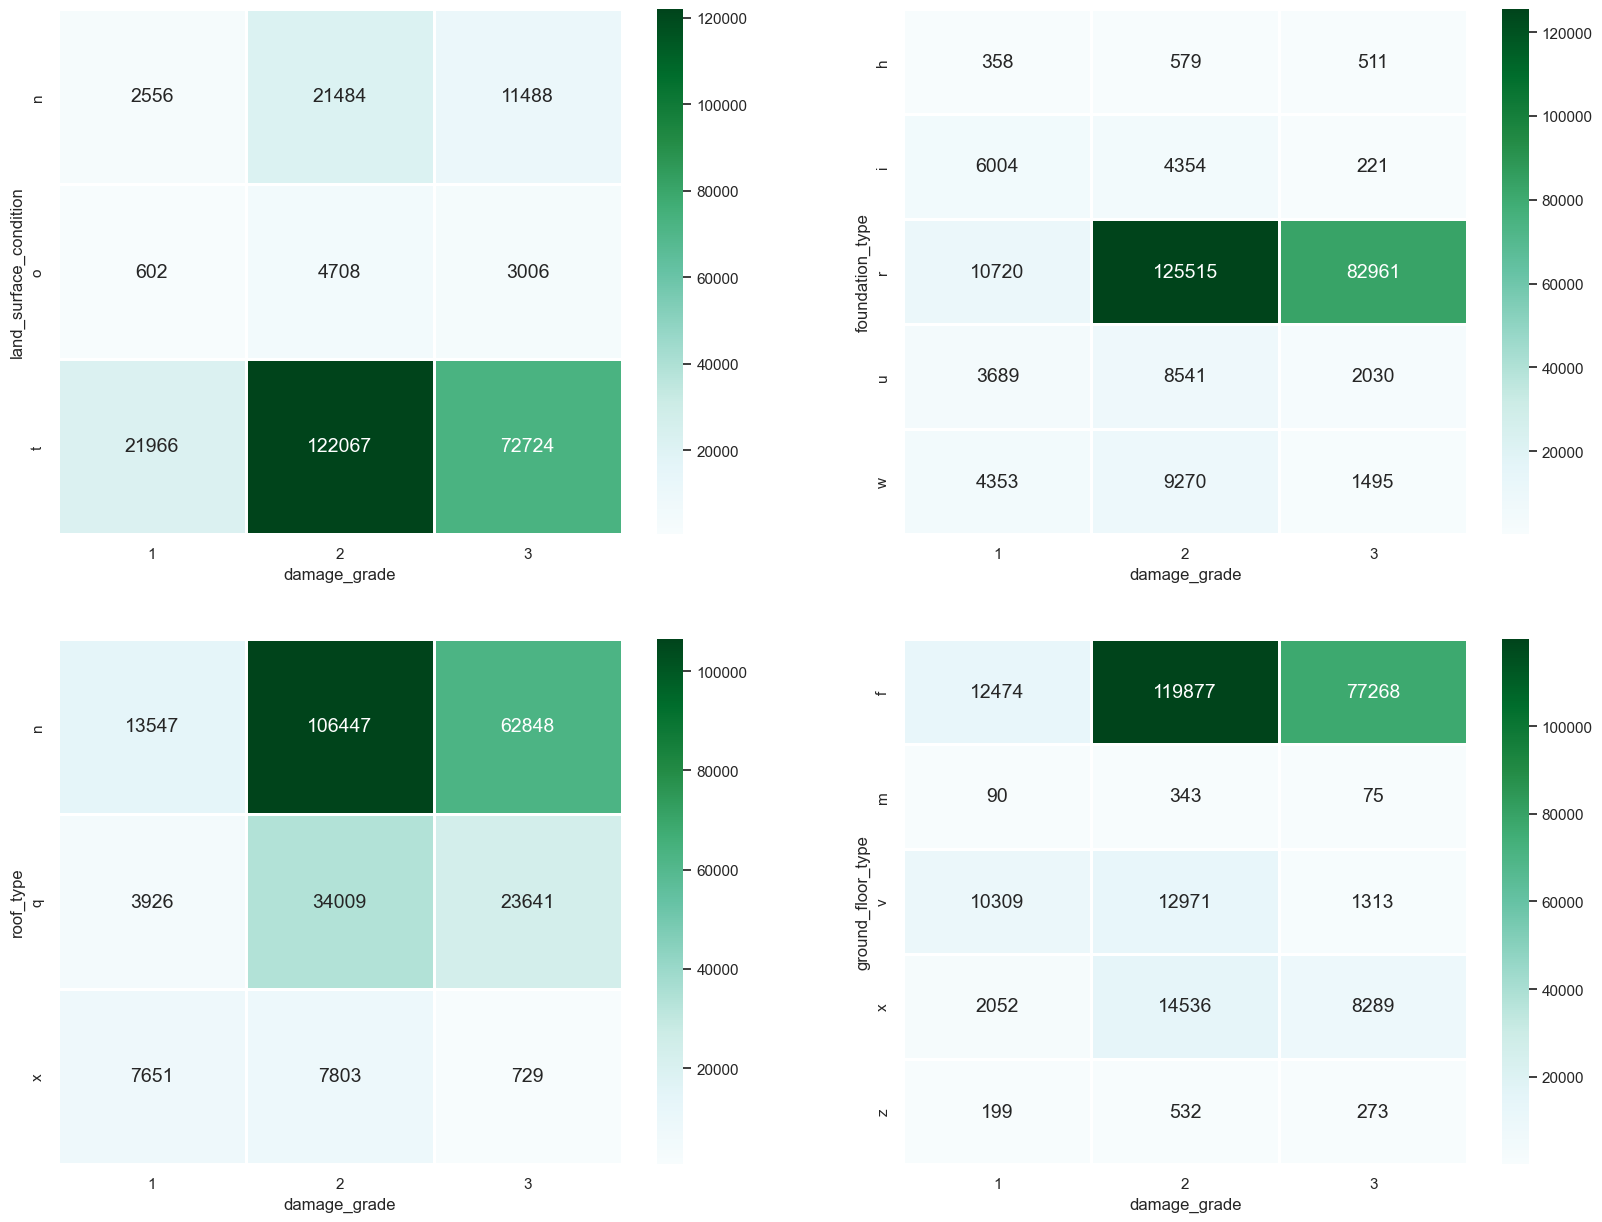

In [38]:
f, axes = plt.subplots(2, 2, figsize=(20, 15))
sns.heatmap(train.groupby(['land_surface_condition', 'damage_grade']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[0,0])
sns.heatmap(train.groupby(['foundation_type', 'damage_grade']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[0,1])
sns.heatmap(train.groupby(['roof_type', 'damage_grade']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[1,0])
sns.heatmap(train.groupby(['ground_floor_type', 'damage_grade']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[1,1])

<AxesSubplot: xlabel='damage_grade', ylabel='legal_ownership_status'>

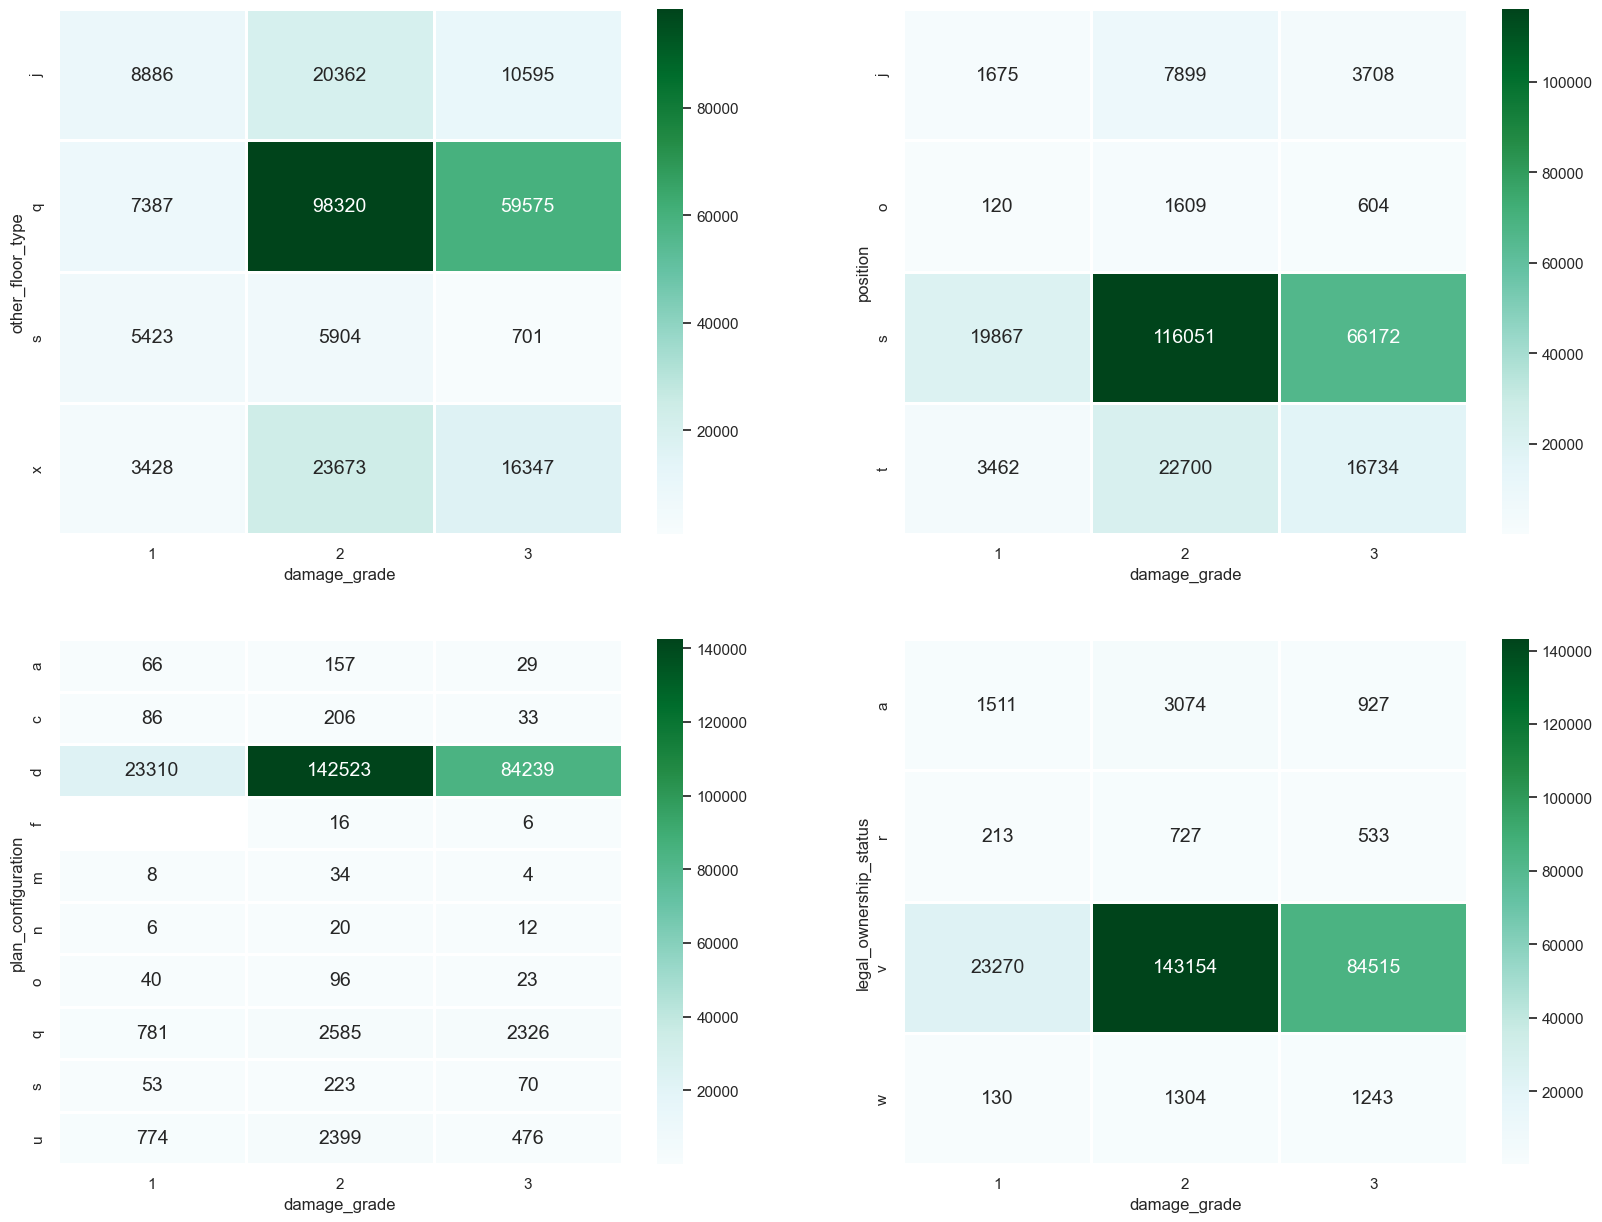

In [39]:
f, axes = plt.subplots(2, 2, figsize=(20, 15))
sns.heatmap(train.groupby(['other_floor_type', 'damage_grade']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[0,0])
sns.heatmap(train.groupby(['position', 'damage_grade']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[0,1])
sns.heatmap(train.groupby(['plan_configuration', 'damage_grade']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[1,0])
sns.heatmap(train.groupby(['legal_ownership_status', 'damage_grade']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[1,1])

In [40]:
train_new.columns

Index(['roof_type', 'foundation_type', 'land_surface_condition',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status', 'damage_grade'],
      dtype='object')

In [41]:
corr = train.drop('damage_grade',axis=1).corr()

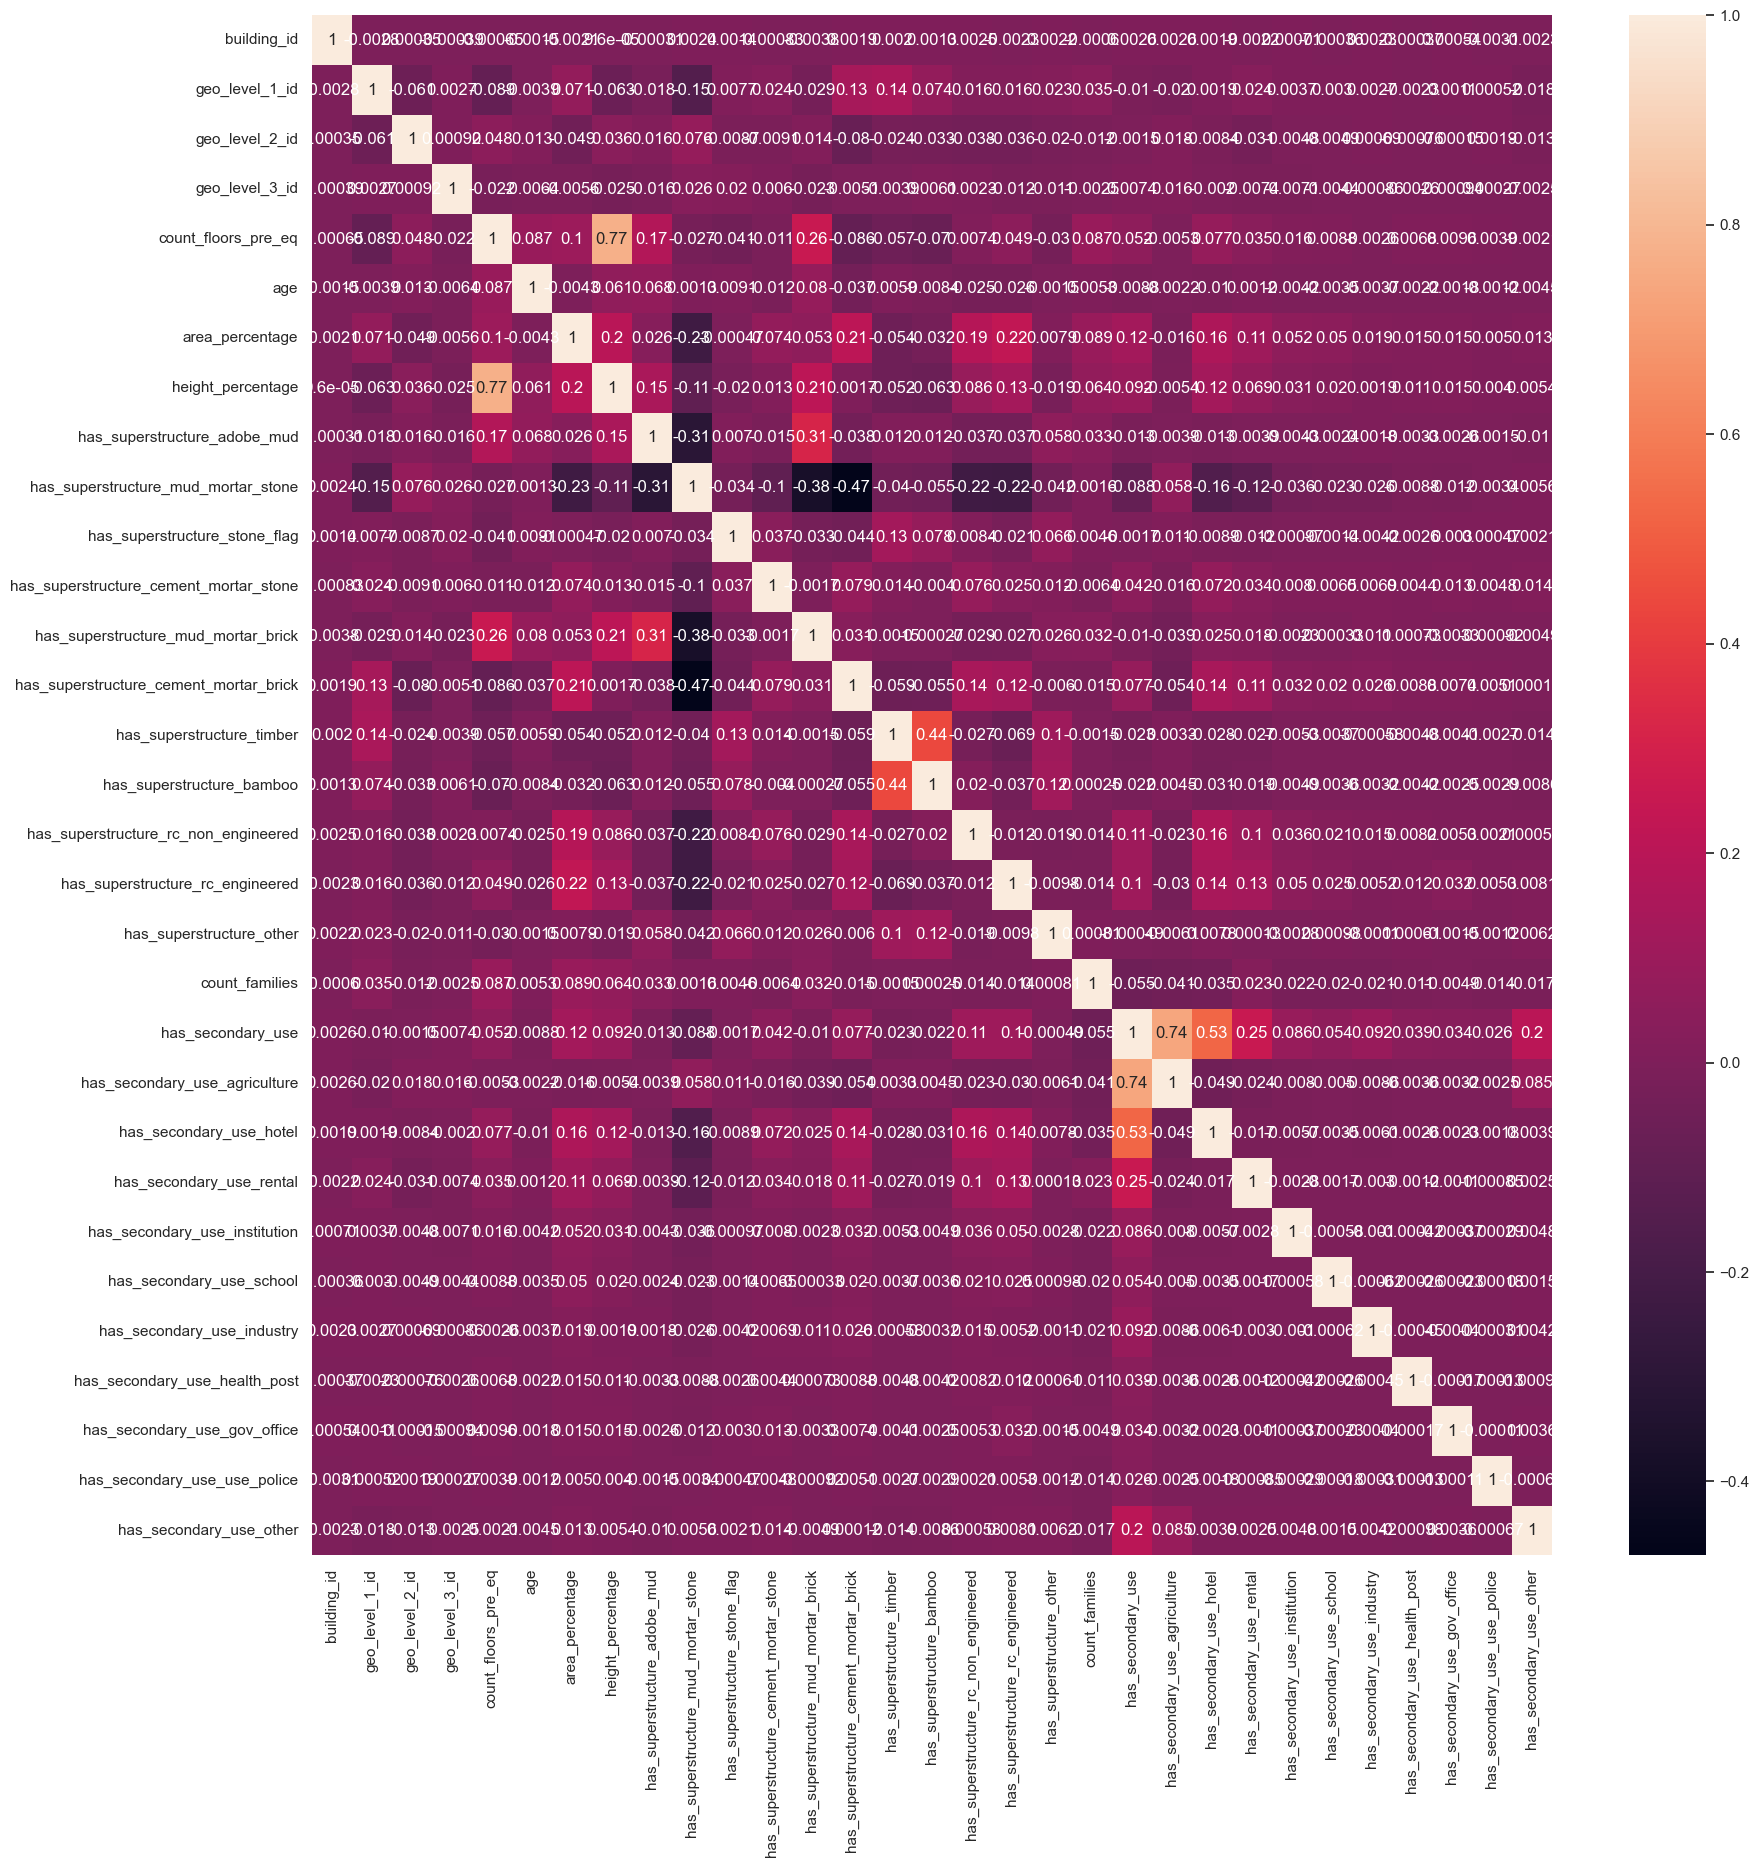

In [42]:
plt.figure(figsize=[20,20],)
sns.heatmap(corr, annot = True)
plt.show()

Insights:
    
There are not a lot of correlated fields.
has_secondary_use is correlated with it's sub_parts and
height_percentage is highly correlated with count_floors_pre_eq
area_percentage and height_percentage are correlated with has_super_structure features and seconday use of buildings.

  Hypothesis Testing

Predictions are considered meaningful if progress can be demonstrated beyond random chance.

Thus, statistical hypothesis testing approaches are used to assess the probability that an earthquake such as is expected will occur anyway (the null hypothesis).

Then, the predictions are tested by checking whether they match better than the null hypothesis with real earthquakes.

In [43]:
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

In [44]:
chi2_stat, p_value, dof, ex = stats.chi2_contingency(pd.crosstab(train.roof_type,train.damage_grade))
print("--chi2_contingency hypothesis test--")
print("\n")
print("Chi2 Stat :",chi2_stat)
print("Degrees of Freedom :",dof)
print("P-Value :",p_value)
print("Contingency Table :",ex)

if p_value < 0.05:
    print(f"p-value={p_value:.3f}, Null hypothesis is rejected")
else:
    print(f"p-value={p_value:.3f} failed to reject null hypothesis.")

--chi2_contingency hypothesis test--


Chi2 Stat : 30251.419274079504
Degrees of Freedom : 4
P-Value : 0.0
Contingency Table : [[ 17627.41665611 104020.98256722  61193.60077667]
 [  5936.41399688  35031.31677929  20608.26922383]
 [  1560.16934701   9206.70065349   5416.1299995 ]]
p-value=0.000, Null hypothesis is rejected


In [45]:
chi2_stat, p_value, dof, ex = stats.chi2_contingency(pd.crosstab(train.foundation_type,train.damage_grade))
print("--chi2_contingency hypothesis test--")
print("\n")
print("Chi2 Stat :",chi2_stat)
print("Degrees of Freedom :",dof)
print("P-Value :",p_value)
print("Contingency Table :",ex)

if p_value < 0.05:
    print(f"p-value={p_value:.3f}, Null hypothesis is rejected")
else:
    print(f"p-value={p_value:.3f} failed to reject null hypothesis.")

--chi2_contingency hypothesis test--


Chi2 Stat : 48547.16073841265
Degrees of Freedom : 8
P-Value : 0.0
Contingency Table : [[   139.59866616    823.78437535    484.61695849]
 [  1019.89937107   6018.51858205   3540.58204688]
 [ 21132.23012959 124703.20437757  73360.56549284]
 [  1374.77691951   8112.68314396   4772.53993653]
 [  1457.49491368   8600.80952107   5059.69556525]]
p-value=0.000, Null hypothesis is rejected


In [46]:
chi2_stat, p_value, dof, ex = stats.chi2_contingency(pd.crosstab(train.land_surface_condition,train.damage_grade))
print("--chi2_contingency hypothesis test--")
print("\n")
print("Chi2 Stat :",chi2_stat)
print("Degrees of Freedom :",dof)
print("P-Value :",p_value)
print("Contingency Table :",ex)

if p_value < 0.05:
    print(f"p-value={p_value:.3f}, Null hypothesis is rejected")
else:
    print(f"p-value={p_value:.3f} failed to reject null hypothesis.")

--chi2_contingency hypothesis test--


Chi2 Stat : 449.6713606103201
Degrees of Freedom : 4
P-Value : 5.115608104233124e-96
Contingency Table : [[  3425.18053269  20212.30061281  11890.51885449]
 [   801.72825123   4731.07103964   2783.20070913]
 [ 20897.09121607 123315.62834755  72544.28043638]]
p-value=0.000, Null hypothesis is rejected


In [47]:
chi2_stat, p_value, dof, ex = stats.chi2_contingency(pd.crosstab(train.ground_floor_type,train.damage_grade))
print("--chi2_contingency hypothesis test--")
print("\n")
print("Chi2 Stat :",chi2_stat)
print("Degrees of Freedom :",dof)
print("P-Value :",p_value)
print("Contingency Table :",ex)

if p_value < 0.05:
    print(f"p-value={p_value:.3f}, Null hypothesis is rejected")
else:
    print(f"p-value={p_value:.3f} failed to reject null hypothesis.")

--chi2_contingency hypothesis test--


Chi2 Stat : 36430.84896491971
Degrees of Freedom : 8
P-Value : 0.0
Contingency Table : [[2.02089315e+04 1.19254735e+05 7.01553330e+04]
 [4.89752227e+01 2.89007226e+02 1.70017552e+02]
 [2.37095994e+03 1.39912494e+04 8.23079065e+03]
 [2.39833979e+03 1.41528204e+04 8.32583983e+03]
 [9.67935503e+01 5.71187509e+02 3.36018941e+02]]
p-value=0.000, Null hypothesis is rejected


In [48]:
chi2_stat, p_value, dof, ex = stats.chi2_contingency(pd.crosstab(train.other_floor_type,train.damage_grade))
print("--chi2_contingency hypothesis test--")
print("\n")
print("Chi2 Stat :",chi2_stat)
print("Degrees of Freedom :",dof)
print("P-Value :",p_value)
print("Contingency Table :",ex)

if p_value < 0.05:
    print(f"p-value={p_value:.3f}, Null hypothesis is rejected")
else:
    print(f"p-value={p_value:.3f} failed to reject null hypothesis.")

--chi2_contingency hypothesis test--


Chi2 Stat : 31487.39192072909
Degrees of Freedom : 6
P-Value : 0.0
Contingency Table : [[ 3841.18070153 22667.15529488 13334.66400359]
 [15934.49360517 94030.89028054 55316.61611429]
 [ 1159.59444515  6842.87186926  4025.5336856 ]
 [ 4188.73124815 24718.08255532 14541.18619652]]
p-value=0.000, Null hypothesis is rejected


In [49]:
chi2_stat, p_value, dof, ex = stats.chi2_contingency(pd.crosstab(train.position,train.damage_grade))
print("--chi2_contingency hypothesis test--")
print("\n")
print("Chi2 Stat :",chi2_stat)
print("Degrees of Freedom :",dof)
print("P-Value :",p_value)
print("Contingency Table :",ex)

if p_value < 0.05:
    print(f"p-value={p_value:.3f}, Null hypothesis is rejected")
else:
    print(f"p-value={p_value:.3f} failed to reject null hypothesis.")

--chi2_contingency hypothesis test--


Chi2 Stat : 1079.9274356300548
Degrees of Freedom : 6
P-Value : 4.592452675444982e-230
Contingency Table : [[  1280.4899751    7556.28734349   4445.22268142]
 [   224.91967414   1327.27137271    780.80895315]
 [ 19483.07627369 114971.39807599  67635.52565032]
 [  4135.51407708  24404.04320782  14356.44271511]]
p-value=0.000, Null hypothesis is rejected


In [50]:
chi2_stat, p_value, dof, ex = stats.chi2_contingency(pd.crosstab(train.plan_configuration,train.damage_grade))
print("--chi2_contingency hypothesis test--")
print("\n")
print("Chi2 Stat :",chi2_stat)
print("Degrees of Freedom :",dof)
print("P-Value :",p_value)
print("Contingency Table :",ex)

if p_value < 0.05:
    print(f"p-value={p_value:.3f}, Null hypothesis is rejected")
else:
    print(f"p-value={p_value:.3f} failed to reject null hypothesis.")

--chi2_contingency hypothesis test--


Chi2 Stat : 1734.1171250474172
Degrees of Freedom : 18
P-Value : 0.0
Contingency Table : [[2.42947955e+01 1.43365789e+02 8.43394154e+01]
 [3.13325736e+01 1.84896355e+02 1.08771071e+02]
 [2.41089210e+04 1.42268927e+05 8.36941520e+04]
 [2.12097421e+00 1.25160610e+01 7.36296484e+00]
 [4.43476426e+00 2.61699456e+01 1.53952901e+01]
 [3.66350091e+00 2.16186507e+01 1.27178484e+01]
 [1.53288591e+01 9.04569860e+01 5.32141550e+01]
 [5.48753873e+02 3.23824632e+03 1.90499981e+03]
 [3.33571398e+01 1.96843504e+02 1.15799356e+02]
 [3.51792495e+02 2.07595938e+03 1.22124812e+03]]
p-value=0.000, Null hypothesis is rejected


In [51]:
chi2_stat, p_value, dof, ex = stats.chi2_contingency(pd.crosstab(train.legal_ownership_status,train.damage_grade))
print("--chi2_contingency hypothesis test--")
print("\n")
print("Chi2 Stat :",chi2_stat)
print("Degrees of Freedom :",dof)
print("P-Value :",p_value)
print("Contingency Table :",ex)

if p_value < 0.05:
    print(f"p-value={p_value:.3f}, Null hypothesis is rejected")
else:
    print(f"p-value={p_value:.3f} failed to reject null hypothesis.")

--chi2_contingency hypothesis test--


Chi2 Stat : 2586.162841474136
Degrees of Freedom : 6
P-Value : 0.0
Contingency Table : [[5.31400447e+02 3.13584218e+03 1.84475737e+03]
 [1.42008864e+02 8.38007172e+02 4.92983964e+02]
 [2.41925067e+04 1.42762174e+05 8.39843197e+04]
 [2.58083998e+02 1.52297705e+03 8.95938949e+02]]
p-value=0.000, Null hypothesis is rejected


In [52]:
# ANOVA TEST for - foundation_type with Age
f_stats, p_value = stats.f_oneway(train[train['foundation_type'] =='r']['age'],
                                  train[train['foundation_type'] =='w']['age'],
                                  train[train['foundation_type'] =='i']['age'],
                                  train[train['foundation_type'] =='u']['age'],
                                  train[train['foundation_type'] =='h']['age'])

print("--ANOVA hypothesis test--")
print("\n")
print("F_statistics:", f_stats)
print("P-value:", p_value)

if p_value < 0.05:
    print(f"p-value={p_value:.3f}, Null hypothesis is rejected")
else:
    print(f"p-value={p_value:.3f} failed to reject null hypothesis.")

--ANOVA hypothesis test--


F_statistics: 393.52372204665653
P-value: 0.0
p-value=0.000, Null hypothesis is rejected


In [53]:
# ANOVA TEST for - plan_configuration with Age
f_stats, p_value = stats.f_oneway(train[train['plan_configuration'] =='d']['age'],
                                  train[train['plan_configuration'] =='q']['age'],
                                  train[train['plan_configuration'] =='u']['age'],
                                  train[train['plan_configuration'] =='s']['age'],
                                  train[train['plan_configuration'] =='c']['age'],
                                  train[train['plan_configuration'] =='a']['age'],
                                  train[train['plan_configuration'] =='o']['age'],
                                  train[train['plan_configuration'] =='m']['age'],
                                  train[train['plan_configuration'] =='n']['age'],
                                  train[train['plan_configuration'] =='f']['age'])

print("--ANOVA hypothesis test--")
print("\n")
print("F_statistics:", f_stats)
print("P-value:", p_value)

if p_value < 0.05:
    print(f"p-value={p_value:.3f}, Null hypothesis is rejected")
else:
    print(f"p-value={p_value:.3f} failed to reject null hypothesis.")

--ANOVA hypothesis test--


F_statistics: 6.082685360375924
P-value: 1.3655992304336039e-08
p-value=0.000, Null hypothesis is rejected


 Preporcessing

Feature selection

In [54]:
# Remove building_id
# We are not making Predictions with Building_id
train.drop('building_id',axis=1,inplace=True)
test_X.drop('building_id',axis=1,inplace=True)

In [55]:
train.drop(columns=['geo_level_2_id', 'geo_level_3_id'], inplace=True)
test_X.drop(columns=['geo_level_2_id', 'geo_level_3_id'], inplace=True)

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 37 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   count_floors_pre_eq                     260601 non-null  int64 
 2   age                                     260601 non-null  int64 
 3   area_percentage                         260601 non-null  int64 
 4   height_percentage                       260601 non-null  int64 
 5   land_surface_condition                  260601 non-null  object
 6   foundation_type                         260601 non-null  object
 7   roof_type                               260601 non-null  object
 8   ground_floor_type                       260601 non-null  object
 9   other_floor_type                        260601 non-null  object
 10  position                                260601 non-null 

In [57]:
# Split data into objectcols and numericals
objectcols=train.select_dtypes(include=['object'])
numariccols=train.select_dtypes(include=np.number)

In [58]:
objectcols.columns

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')

In [59]:
numariccols.columns

Index(['geo_level_1_id', 'count_floors_pre_eq', 'age', 'area_percentage',
       'height_percentage', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'damage_grade'],
      dtype='object')

In [60]:
categorycols=numariccols[[
       'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick',
       'has_superstructure_timber',
       'has_superstructure_bamboo', 
       'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered',
       'has_superstructure_other', 
       'has_secondary_use',
       'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 
       'has_secondary_use_rental',
       'has_secondary_use_institution',
       'has_secondary_use_school',
       'has_secondary_use_industry',
       'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 
       'has_secondary_use_use_police',
       'has_secondary_use_other']]

In [61]:
numariccols=numariccols.drop([
       'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick',
       'has_superstructure_timber',
       'has_superstructure_bamboo', 
       'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered',
       'has_superstructure_other', 
       'has_secondary_use',
       'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 
       'has_secondary_use_rental',
       'has_secondary_use_institution',
       'has_secondary_use_school',
       'has_secondary_use_industry',
       'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 
       'has_secondary_use_use_police',
       'has_secondary_use_other'],axis=1)

In [62]:
numariccols=numariccols.drop(['damage_grade'],axis=1)

In [63]:
numariccols.columns

Index(['geo_level_1_id', 'count_floors_pre_eq', 'age', 'area_percentage',
       'height_percentage', 'has_superstructure_adobe_mud', 'count_families'],
      dtype='object')

In [64]:
objectcols.columns

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')

In [65]:
categorycols.columns

Index(['has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other'],
      dtype='object')

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler=StandardScaler()

In [68]:
numariccols_scaled=scaler.fit_transform(numariccols)

In [69]:
numariccols_scaled=pd.DataFrame(numariccols_scaled,columns=['geo_level_1_id', 'count_floors_pre_eq', 'age', 'area_percentage',
       'height_percentage', 'has_superstructure_adobe_mud', 'count_families'])

In [70]:
numariccols_scaled.head()

,geo_level_1_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,count_families
0,-0.983414,-0.178274,0.047100,-0.459460,-0.226419,3.206391,0.038365
1,-0.734459,-0.178274,-0.224765,-0.004110,0.816109,-0.311877,0.038365
2,0.883744,-0.178274,-0.224765,-0.687135,-0.226419,-0.311877,0.038365
3,1.008221,-0.178274,-0.224765,-0.459460,-0.226419,-0.311877,0.038365
4,-0.361028,1.195989,0.047100,-0.004110,1.858636,3.206391,0.038365


In [71]:
# Lable Encoding or Dummy Encoding objectcols 
from sklearn.preprocessing import LabelEncoder

In [72]:
le=LabelEncoder()

In [73]:
categorycols_encode=categorycols.apply(le.fit_transform)

In [74]:
objectcols_encode=objectcols.apply(le.fit_transform)

In [75]:
objectcols_encode=pd.DataFrame(objectcols_encode,columns=['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'])

In [76]:
categorycols_encode=pd.DataFrame(categorycols_encode,columns=['has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other'])

In [77]:
objectcols_encode.head()

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
0,2,2,0,0,1,3,2,2
1,1,2,0,3,1,2,2,2
2,2,2,0,0,3,3,2,2
3,2,2,0,0,3,2,2,2
4,2,2,0,0,3,2,2,2


In [78]:
categorycols_encode.head()

,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
numariccols_scaled=numariccols_scaled.reset_index()

In [80]:
objectcols_encode=objectcols_encode.reset_index()

In [81]:
categorycols_encode=categorycols_encode.reset_index()

In [82]:
train_df=pd.concat([numariccols_scaled,categorycols_encode,objectcols_encode],axis=1)

In [83]:
X = train_df
y = train['damage_grade']

In [84]:
from sklearn.preprocessing import LabelEncoder

In [85]:
y=LabelEncoder().fit_transform(y)

In [86]:
X.columns

Index(['index', 'geo_level_1_id', 'count_floors_pre_eq', 'age',
       'area_percentage', 'height_percentage', 'has_superstructure_adobe_mud',
       'count_families', 'index', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'index', 'land_surface_condition',
       'foundation_type

In [87]:
train.columns

Index(['geo_level_1_id', 'count_floors_pre_eq', 'age', 'area_percentage',
       'height_percentage', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_sec

Model Building

Spiliting Dataset into training(70%) and test set(30%)



In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [90]:
X_train.shape

(182420, 39)

In [91]:
X_test.shape

(78181, 39)

Logistic Regression

In Logistic Regression, we wish to model a dependent variable(Y) in terms of one or more independent variables(X).
It is a method for classification. 
This algorithm is used for the dependent variable that is Categorical. 
Y is modeled using a function that gives output between 0 and 1 for all values of X.
In Logistic Regression, the Sigmoid (aka Logistic) Function is used

In [92]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [93]:
y_pred = logmodel.predict(X_test)

In [94]:
# Create a classification report for the model.
from sklearn.metrics import classification_report

In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7479
           1       0.57      1.00      0.73     44698
           2       0.00      0.00      0.00     26004

    accuracy                           0.57     78181
   macro avg       0.19      0.33      0.24     78181
weighted avg       0.33      0.57      0.42     78181



In [96]:
from sklearn.metrics import  accuracy_score

In [97]:
acc1= accuracy_score(y_test, y_pred)
acc1

0.5717245878154539

In [98]:
from sklearn.metrics import confusion_matrix
cm1 =confusion_matrix(y_test, y_pred)
cm1

array([[    0,  7479,     0],
       [    0, 44698,     0],
       [    0, 26004,     0]], dtype=int64)

In [99]:
from sklearn.metrics import ConfusionMatrixDisplay

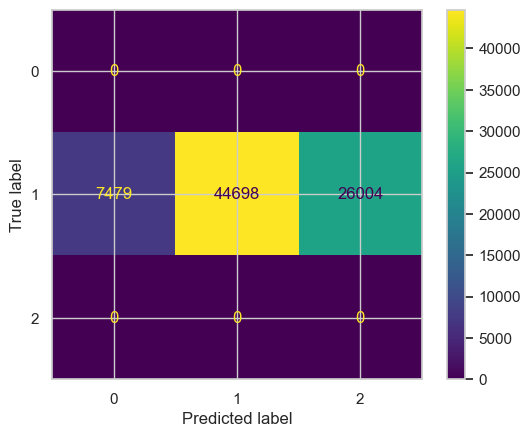

In [100]:
ConfusionMatrixDisplay.from_predictions(y_pred,y_test)

Decision Tree Algorithm

The idea of a decision tree is to divide the data set into smaller data sets based on the descriptive features until you reach a small enough set that contains data points that fall under one label.

Advantages of Decision Trees Decision trees are easy to interpret. To build a decision tree requires little data preparation from the user- there is no need to normalize data

Disadvantages of Decision Trees Decision trees are likely to overfit noisy data. The probability of overfitting on noise increases as a tree gets deeper.

In [101]:
from sklearn.tree import DecisionTreeClassifier
Dtc= DecisionTreeClassifier(criterion = 'entropy',random_state = 0)

In [102]:
Dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [103]:
y_pred = Dtc.predict(X_test)

In [104]:
acc2 = accuracy_score(y_test, y_pred)
acc2

0.5960911218838336

In [105]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.42      0.43      0.42      7479
           1       0.66      0.65      0.66     44698
           2       0.54      0.55      0.54     26004

    accuracy                           0.60     78181
   macro avg       0.54      0.54      0.54     78181
weighted avg       0.60      0.60      0.60     78181



In [106]:
from sklearn.metrics import confusion_matrix
cm2 =confusion_matrix(y_test, y_pred)
cm2

array([[ 3180,  3627,   672],
       [ 3847, 29130, 11721],
       [  581, 11130, 14293]], dtype=int64)

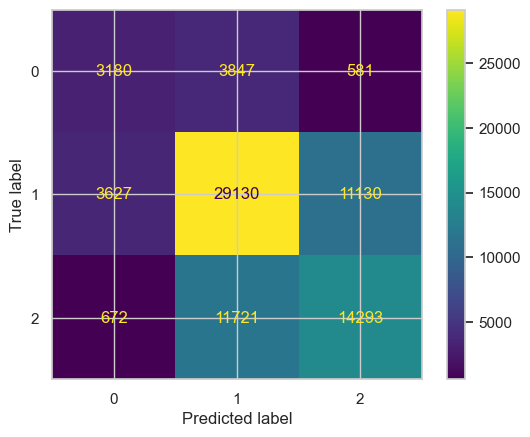

In [107]:
ConfusionMatrixDisplay.from_predictions(y_pred,y_test)

Random Forest Algorithm

Random Forest Classification

Random Forest is a supervised learning algorithm, it creates a forest and makes it somehow random. The "forest“ it builds, is an ensemble of Decision Trees.

Step1:- Pick at random K data points from the training set

Step2:- Build the Decision tree associated to these K data points

Step3:- Choose the Number of trees(n) you want to build and repeat STEP1 and STEP2

Step4:- For a new data points make each one of your 'n' trees predict the category to which the data point belongs and assign the new data point to the category that wins the majority vote

In [108]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)

In [109]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [110]:
y_pred = rfc.predict(X_test)

In [111]:
acc3= accuracy_score(y_test, y_pred)
acc3

0.6800501400596053

In [112]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.40      0.49      7479
           1       0.69      0.82      0.75     44698
           2       0.67      0.52      0.59     26004

    accuracy                           0.68     78181
   macro avg       0.66      0.58      0.61     78181
weighted avg       0.68      0.68      0.67     78181



In [113]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test, y_pred)
cm3

array([[ 2983,  4349,   147],
       [ 1694, 36581,  6423],
       [  140, 12261, 13603]], dtype=int64)

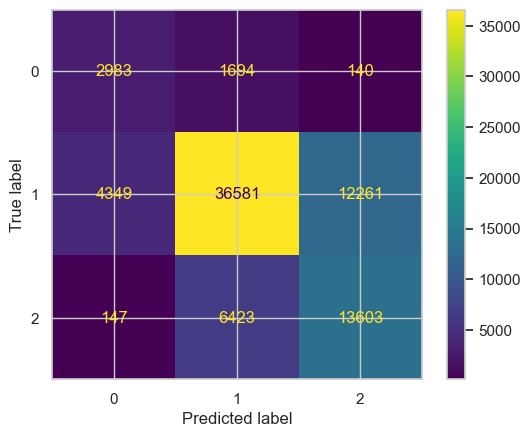

In [114]:
ConfusionMatrixDisplay.from_predictions(y_pred,y_test)

Gaussian Naive Bayes

In [115]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)

GaussianNB()

In [116]:
y_pred =naive_bayes.predict(X_test)

In [117]:
acc4= accuracy_score(y_test, y_pred)
acc4

0.5716222611631983

In [118]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.28      0.00      0.00      7479
           1       0.57      1.00      0.73     44698
           2       0.00      0.00      0.00     26004

    accuracy                           0.57     78181
   macro avg       0.28      0.33      0.24     78181
weighted avg       0.35      0.57      0.42     78181



In [119]:
cm4 = confusion_matrix(y_test, y_pred)
cm4

array([[   11,  7468,     0],
       [   19, 44679,     0],
       [    9, 25995,     0]], dtype=int64)

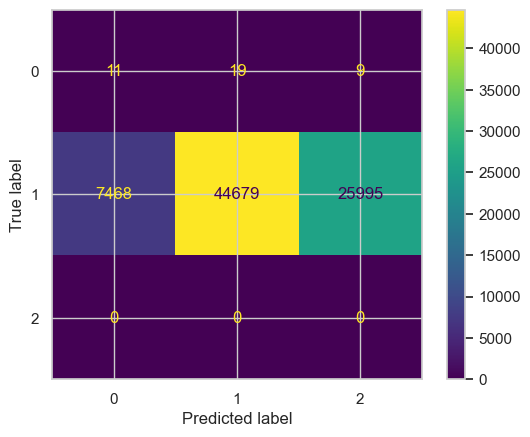

In [120]:
ConfusionMatrixDisplay.from_predictions(y_pred,y_test)

Gradient Boosting Machine

In [121]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(n_estimators=100,max_depth=1, random_state=0)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=1, random_state=0)

In [122]:
#Predicting the Test set results
y_pred = gbm.predict(X_test)

In [123]:
acc5= accuracy_score(y_test, y_pred)
acc5

0.6399764648699812

In [124]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.22      0.33      7479
           1       0.62      0.95      0.75     44698
           2       0.83      0.23      0.35     26004

    accuracy                           0.64     78181
   macro avg       0.68      0.47      0.48     78181
weighted avg       0.69      0.64      0.58     78181



In [125]:
cm5 = confusion_matrix(y_test, y_pred)
cm5

array([[ 1676,  5786,    17],
       [ 1056, 42496,  1146],
       [   74, 20068,  5862]], dtype=int64)

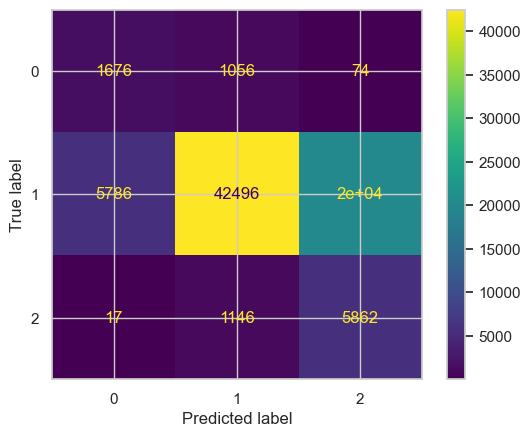

In [126]:
ConfusionMatrixDisplay.from_predictions(y_pred,y_test)

KNeighborsClassifier

In [127]:
from sklearn.neighbors import KNeighborsClassifier

Create a KNN model instance with n_neighbors=5
Fit this KNN model to the training data.

In [128]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [129]:
#Predicting the Test set results
y_pred = knn.predict(X_test)

In [130]:
acc6= accuracy_score(y_test, y_pred)
acc6

0.49524820608587766

In [131]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.10      0.05      0.07      7479
           1       0.57      0.73      0.64     44698
           2       0.33      0.22      0.27     26004

    accuracy                           0.50     78181
   macro avg       0.34      0.33      0.33     78181
weighted avg       0.45      0.50      0.46     78181



In [132]:
cm6 = confusion_matrix(y_test, y_pred)
cm6

array([[  387,  5469,  1623],
       [ 2202, 32556,  9940],
       [ 1243, 18985,  5776]], dtype=int64)

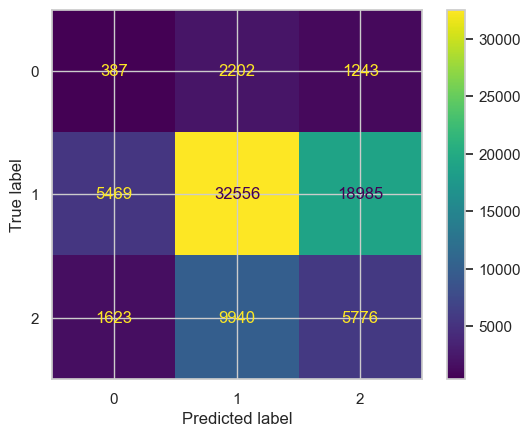

In [133]:
ConfusionMatrixDisplay.from_predictions(y_pred,y_test)

Logistic Regression-0.571724

Decision Tree Algorithm-0.596091

Random Forest Algorithm -0.6800501

Gaussian Naive Bayes- 0.5716222

Gradient Boosting Machine - 0.63997646

KNeighborsClassifier- 0.495248

# Conclusion



Below is the summary of data exploration

The target value is imbalanced.
Maximum damage happened to 2-storey buildings


Building's age is binned in intervals of 5. Most of the building are 0-100 years old.

There are also few outliers which can be excluded from teh analysis


area_percentage and height_percentage variables are already normalized


Most of the damaged buildings are single family homes. We can infer that most of the damage happend to residential areas


With the methods we used, the greatest
accuracy we were able to obtain was around
68%. 

Our findings indicate that the number of
floors, the superstructure, the number of families,
the area percentage, and the foundation type were
good predictors of damage_grade. 

We found that
kNN performs decently at predicting damage_grade
but could be better.

Random forest had the greatest
accuracy of the methods we used.

The models were able to best identify entries
with damage_grade = 2. The reason for this
tendency is most likely due to the amount of those
buildings in the dataset


We will continue investigating different ways to
increase the accuracy of our models.

We will try
alternate selections of features to better fit the data.
For random forest, we will try varying amounts of
trees.

Another idea is to modify the age value for
entries with large age values. We will investigate
introducing noise into our discrete values in order to
possibly remove geo_level_id atrributes from our
features.


Additionally, we will attempt other algorithms and
models to better fit our problem statement. Our
future efforts will focus on support vector machines
as well as ordinal logistic regression as potential
solutions

# Below are the findings/summary of data modelling process.

Since the target variable is imbalanced, I tried upsampling as well as downsampling training data but it did not have any significant effect on accuracy.
The training data is semi-anonymized so domain knowledge could not be applied to perform feature engineering.
 models which were tried are

Logistic Regression,Decision Tree Algorithm,Random Forest Algorithm,Gaussian Naive Bayes,Gradient Boosting Machine,KNeighborsClassifier
Only Random Forest happened to give highest accuracy.

# What's next?
With the current model, we are getting accuracy of 0.68.
We will check F micro evaluation matrix.for random forest.

PRIMARY EVALUATION METRIC 

         
Fmicro=(2⋅Pmicro⋅Rmicro)/(Pmicro+Rmicro)
         
The metric used for this competition is the micro-averaged F1 score.

In [134]:
train_values = pd.read_csv('train_values.csv', index_col='building_id')
train_labels = pd.read_csv('train_labels.csv', index_col='building_id')

In [135]:
selected_features = ['foundation_type', 
                     'area_percentage', 
                     'height_percentage',
                     'count_floors_pre_eq',
                     'land_surface_condition',
                     'has_superstructure_cement_mortar_stone']

train_values_subset = train_values[selected_features]

In [136]:
# Pre-process the Data
train_values_subset = pd.get_dummies(train_values_subset)

In [137]:
# for combining the preprocess with model training
from sklearn.pipeline import make_pipeline

# for optimizing the hyperparameters of the pipeline
from sklearn.model_selection import GridSearchCV

In [138]:
# The make_pipeline function automatically names the steps in your pipeline as a lowercase version of whatever the object name is.

pipe = make_pipeline(StandardScaler(), 
                     RandomForestClassifier(random_state=2018))
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=2018))])

In [139]:
# From here we can easily test a few different models using GridSearchCV.

param_grid = {'randomforestclassifier__n_estimators': [50, 100],
              'randomforestclassifier__min_samples_leaf': [1, 5]}
gs = GridSearchCV(pipe, param_grid, cv=5)

In [140]:
gs.fit(train_values_subset, train_labels.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=2018))]),
             param_grid={'randomforestclassifier__min_samples_leaf': [1, 5],
                         'randomforestclassifier__n_estimators': [50, 100]})

In [141]:
gs.best_params_

{'randomforestclassifier__min_samples_leaf': 5,
 'randomforestclassifier__n_estimators': 100}

In [142]:
from sklearn.metrics import f1_score

in_sample_preds = gs.predict(train_values_subset)
f1_score(train_labels, in_sample_preds, average='micro')

0.5894183061461775

TIME TO PREDICT AND SUBMIT


For the F1 Micro metric, we'll be using the class predictions, not the class probabilities. Let's load up the data, process it, and see what we get on the leaderboard.

In [143]:
test_values = pd.read_csv('test_values.csv', index_col='building_id')

Select the subset of features we used to train the model and create dummy variables.

In [144]:
test_values_subset = test_values[selected_features]
test_values_subset = pd.get_dummies(test_values_subset)

Make Predictions
Note that we use the class predictions, not the class probabilities.

In [145]:
predictions = gs.predict(test_values_subset)

Save Submission
We can use the column name and index from the submission format to ensure our predictions are in the form.

In [146]:
submission_format = pd.read_csv('submission_format.csv', index_col='building_id')

In [147]:
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [148]:
my_submission.head()

,damage_grade
building_id,
300051,3
99355,2
890251,2
745817,2
421793,2


In [149]:
my_submission.to_csv('submission.csv')